 # PEC1: CREACIÓN DE LOS ÁRBOLES DE DECISIÓN

# Instalamos previamente paquetes y cargamos librerías

In [1]:
install.packages('corrplot', dependencies=c("Depends", "Imports"), repos='http://cran.es.r-project.org')

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Víctor\AppData\Local\Temp\RtmpIf5ndq\downloaded_packages


In [1]:
install.packages('C50', dependencies=c("Depends", "Imports"), repos='http://cran.es.r-project.org')

also installing the dependencies 'Formula', 'partykit'



package 'Formula' successfully unpacked and MD5 sums checked
package 'partykit' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Víctor\AppData\Local\Temp\RtmpEx3XvY\downloaded_packages


In [52]:
install.packages('gmodels',repos='http://cran.es.r-project.org')

also installing the dependencies 'gtools', 'gdata'



package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Víctor\AppData\Local\Temp\RtmpEx3XvY\downloaded_packages


In [53]:
library(mlbench)
library(caret)
library(corrplot)
library(ggplot2)
library(C50)
library(gmodels)

Warning message:
"package 'mlbench' was built under R version 3.3.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'corrplot' was built under R version 3.3.2"Warning message:
"package 'C50' was built under R version 3.3.2"Warning message:
"package 'gmodels' was built under R version 3.3.2"

## a) Selección de un conjunto de datos.


Objetivo del proyecto: Con el objetivo de mejorar la operativa de los vuelos, se va a elaborar un modelo para predecir cuando un vuelo va a retrasarse. Con este modelo las aerolíneas podrán determinar cuando se producen algunos patrones que llevan a un vuelo a retrasarse.

El objetivo de clasificación será si el vuelo se retrasa o no.

El conjunto de datos escogido que recoge información sobre los retrasos en los vuelos se puede descargar del siguiente repositorio http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time. 

Se ha fijado el año 2016 y el mes Julio para esta práctica. 

Descripción de las variables usadas
1. UNIQUE_CARRIER: nombre en siglas de la compañía áerea (cádena de caracteres).
2. TAIL_NUM: código que identifica el avión (cádena de caracteres).
3. FL_NUM: número de vuelo (númerico).	
4. ORIGIN: código del aeropuerto de origen (cádena de caracteres)
5. DEST: código del aeropuerto de destino (cádena de caracteres)
6. CRS_DEP_TIME: hora que la aerolínea tiene estimada como hora de salida (hhmm)		 
7. DEP_TIME: hora real de salida del vuelo (hhmm)		 
8. DEP_DELAY: diferencia en minutos entre la hora estimada por la compañía y la hora real de salida.Si la salida es anterior a la prevista será negativo (minutos).
9. DEP_DELAY_NEW: diferencia en minutos entre la hora estimada por la compañía y la hora real de salida.Si la salida es anterior a la prevista se pone un 0 (minutos).
10. DEP_DEL15: indicador de retraso de 15 minutos o más en la salida (1=Si, 0=No)11. DEP_DELAY_GROUP: intervalos en los retrasos en las salidas cada 15 minutos.
12. TAXI_OUT: tiempo de rodadura desde la puerta hasta la pista en el aeropuerto de origen (minutos).
13. TAXI_IN: tiempo de rodadura desde la puerta hasta la pista en el aeropuerto de destino(minutos).		 
14. CRS_ARR_Time: hora que la aerolínea estima como hora de llegada (hhmm)15. ARR_TIME:	Actual Arrival Time, hora real de llegada del vuelo (hhmm)		 
16. ARR_DELAY: diferencia en minutos entre la hora estimada por la compañía de llegada y la hora real. Llegadas tempranas muestran números negativos (minutos)		 
17. ARR_DELAY_NEW: diferencia en minutos entre la hora estimada por la compañía de llegada y la hora real. Llegadas tempranas muestran valor de 0 (minutos).		 
18. ARR_DEL15:indicador de retraso de 15 minutos o más en la llegada (1=Si, 0=No).
19. CANCELLED: indicador de vuelo cancelado (1=Si).
20. CANCELLATION_CODE: indica la razón de cancelación (A=carried, B=Weather, C=National Air System, D=Security)		
21. DIVERTED: indicador de vuelo desviado (1=Si, 0=No)
22. CRS_ELAPSED_TIME: tiempo que la aerolínea tiene estimado como tiempo de vuelo desde la salida en origen hasta la llegada en destino (minutos)		 
23. ACTUAL_ELAPSED_TIME: tiempo real de vuelo desde la salida en origen hasta la llegada en destino (minutos).		 
24. AIR_TIME: Air Time , tiempo real de vuelo en aire (minutos).		 
25. FLIGTHS: numero de vuelos.		 
26. DISTANCE: distancia entre los aeropuertos origen y destino (millas)
27. CARRIER_DELAY: retraso debido a la aerolínea (minutos)
28. WHEATHER_DELAY:	retraso debido al tiempo (minutos)
29. NAS_DELAY: retraso debido al National Air System Delay (minutos)
30. SECURITY_DELAY: retraso debido a los controles de segurida o inspecciones (minutos)		 
31. LATE_AIRCRAFT_DELAY: retraso por llegada tarde del avión (minutos)
32. FIRST_DEP_TIME: Tiempo para llegar a la primera puerta en el aeropuerto de origen (minutos)
33. TOTAL_ADD_GTIME: Tiempo total desde la puerta a la puerta de salida o de vuelo cancelado (minutos).
34. LONGEST_AD_TIME: tiempo mayor de salida desde la puerta a la puerta de salida o de vuelo cancelado(minutos)

## b) Preparación de los datos

### b.1) Creación de nuevas variables

Se va a crear una nueva variable en el fichero Excel, Retrasado con valores Si/No, que indica si un vuelo se ha retrasado o no. Vamos a tomar como referencia de vuelo retrasado si ha llegago más de 15 minutos tarde, por lo que los valores SI/NO se tomarán en función de la variable DEP_DEL15.

Se va a crear una variable nueva DISTANCIA_DISCRETIZADA en el fichero Excel para discretizar los valores de la variable DISTANCIA en 4 grupos (0 a 400, 400 a 800, 800 a 1200 y 1200 a 4000)

Se va a crear una nueva variable CRS_DEP_TIME_HORA en el fichero Excel que incluya solo las horas de salida y no los minutos,para que no exista una gran dispersión de valores.

### b.2) Carga del fichero

In [2]:
setwd ("C:/Users/Víctor/Documents/Data Science/Modelos de clasificacion/PEC1 Retraso en vuelos")
vuelos <- read.csv(file="RetrasosVuelosModificado.csv",comment.char = "#", sep=";")
head(vuelos)
       

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,RETRASADO,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA
1,2016,7,1,5,AA,N793AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
2,2016,7,2,6,AA,N784AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
3,2016,7,4,1,AA,N785AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
4,2016,7,5,2,AA,N790AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
5,2016,7,6,3,AA,N799AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
6,2016,7,7,4,AA,N786AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6


### b.3) Se revisa la calidad del los datos. 

Se revisa si hay duplicados

In [4]:
# cuenta el número de filas
nrow(vuelos)
# Cuenta las filas sin repetidos
x <- unique(vuelos)
nrow(x)

[1] 502457

[1] 502457

Vemos que el número de registros devuelto es el mismo que el original una vez eliminados los posibles registros repetidos, por lo que no hay duplicados

Revisamos la presencia de nulos en las varibles

In [63]:
sapply(vuelos, function(x) sum(is.na(x)))
    

YEAR                  MONTH           DAY_OF_MONTH 
                     0                      0                      0 
           DAY_OF_WEEK         UNIQUE_CARRIER               TAIL_NUM 
                     0                      0                      0 
                FL_NUM                 ORIGIN                   DEST 
                     0                      0                      0 
          CRS_DEP_TIME               DEP_TIME              DEP_DELAY 
                     0                   8850                   8850 
         DEP_DELAY_NEW              DEP_DEL15        DEP_DELAY_GROUP 
                  8850                   8850                   8850 
              TAXI_OUT                TAXI_IN           CRS_ARR_TIME 
                  9263                   9539                      0 
              ARR_TIME              ARR_DELAY          ARR_DELAY_NEW 
                  9539                  11259                  11259 
             ARR_DEL15              CANCELLED      CANCELLATION_CODE 
                 11259                      0                      0 
              DIVERTED       CRS_ELAPSED_TIME    ACTUAL_ELAPSED_TIME 
                     0                      1                  11259 
              AIR_TIME                FLIGHTS               DISTANCE 
                 11259                      0                      0 
         CARRIER_DELAY          WEATHER_DELAY              NAS_DELAY 
                388856                 388856                 388856 
        SECURITY_DELAY    LATE_AIRCRAFT_DELAY         FIRST_DEP_TIME 
                388856                 388856                 498224 
       TOTAL_ADD_GTIME      LONGEST_ADD_GTIME              RETRASADO 
                498224                 498224                      0 
DISTANCIA_DISCRETIZADA      CRS_DEP_TIME_HORA 
                     0                      0

Eliminamos las filas en las que hay valores nulos en las variables donde se indican datos de retrasos en la llegada

In [3]:
Y<-vuelos[!is.na(vuelos$ARR_DEL15),]

In [6]:
head(Y)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,RETRASADO,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA
1,2016,7,1,5,AA,N793AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
2,2016,7,2,6,AA,N784AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
3,2016,7,4,1,AA,N785AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
4,2016,7,5,2,AA,N790AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
5,2016,7,6,3,AA,N799AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
6,2016,7,7,4,AA,N786AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6


In [7]:
sapply(Y, function(x) sum(is.na(x)))

YEAR                  MONTH           DAY_OF_MONTH 
                     0                      0                      0 
           DAY_OF_WEEK         UNIQUE_CARRIER               TAIL_NUM 
                     0                      0                      0 
                FL_NUM                 ORIGIN                   DEST 
                     0                      0                      0 
          CRS_DEP_TIME               DEP_TIME              DEP_DELAY 
                     0                      0                      0 
         DEP_DELAY_NEW              DEP_DEL15        DEP_DELAY_GROUP 
                     0                      0                      0 
              TAXI_OUT                TAXI_IN           CRS_ARR_TIME 
                     0                      0                      0 
              ARR_TIME              ARR_DELAY          ARR_DELAY_NEW 
                     0                      0                      0 
             ARR_DEL15              CANCELLED      CANCELLATION_CODE 
                     0                      0                      0 
              DIVERTED       CRS_ELAPSED_TIME    ACTUAL_ELAPSED_TIME 
                     0                      0                      0 
              AIR_TIME                FLIGHTS               DISTANCE 
                     0                      0                      0 
         CARRIER_DELAY          WEATHER_DELAY              NAS_DELAY 
                377597                 377597                 377597 
        SECURITY_DELAY    LATE_AIRCRAFT_DELAY         FIRST_DEP_TIME 
                377597                 377597                 487411 
       TOTAL_ADD_GTIME      LONGEST_ADD_GTIME              RETRASADO 
                487411                 487411                      0 
DISTANCIA_DISCRETIZADA      CRS_DEP_TIME_HORA 
                     0                      0

Vemos cuantas filas han quedado tras eliminar las filas con nulos en variables relativas a los retrasos en las llegadas.

In [5]:
nrow(Y)

[1] 491198

Descartamos para el análisis las variables que contienen nulos (FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME). Las variables que indican la causa del retraso, solo tienen valor cuando hay retraso. Si nos interesaran estas variables podríamos actualizarlas con un valor NA cuando no tengan valor

# c) Análisis conjunto datos mediante estadística descriptiva

### c.1) Extraemos información gráfica para conocer las variables

Revisamos inicialmente las medidas de tendencia central

In [6]:
summary(Y)

      YEAR          MONTH    DAY_OF_MONTH    DAY_OF_WEEK    UNIQUE_CARRIER  
 Min.   :2016   Min.   :7   Min.   : 1.00   Min.   :1.000   WN     :111330  
 1st Qu.:2016   1st Qu.:7   1st Qu.: 8.00   1st Qu.:2.000   DL     : 83126  
 Median :2016   Median :7   Median :16.00   Median :4.000   AA     : 79912  
 Mean   :2016   Mean   :7   Mean   :16.09   Mean   :4.141   OO     : 54277  
 3rd Qu.:2016   3rd Qu.:7   3rd Qu.:24.00   3rd Qu.:6.000   UA     : 47258  
 Max.   :2016   Max.   :7   Max.   :31.00   Max.   :7.000   EV     : 41022  
                                                            (Other): 74273  
    TAIL_NUM          FL_NUM         ORIGIN            DEST       
 N480HA :   379   Min.   :   1   ATL    : 33586   ATL    : 33501  
 N485HA :   371   1st Qu.: 719   ORD    : 21357   ORD    : 21293  
 N493HA :   349   Median :1616   DEN    : 20625   DEN    : 20527  
 N492HA :   343   Mean   :2088   LAX    : 19607   LAX    : 19663  
 N477HA :   342   3rd Qu.:2845   DFW    : 16945  

De esta información podemos determinar la duración media de los vuelos, la distancia media, la distribución según las compañías,el origen o el destino y los tiempos medios de retrasos tanto en la salida como en la llegada.

A continuación vamos a obtener más información de las variables que consideramos pueden tener relevancia para resolver el problema. 

Consideramos que pueden tener relación con los retrasos del vuelo entre otros, el día de la semana del vuelo, el día del mes, la hora de salida, la distancia, la aerolinea o el origen. Vamos analizar más en detalle estas variables (DAY_OF_MONTH, DAY_OF_WEEK, DISTANCE, CRS_DEP_TIME_HORA)

### Variable DAY_OF_MONTH

[1]  0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32

[1] 30560 27026 33136 33120 30466 33504 33035 31172 32610 32672 31939 30241
[13] 32628 32714 30402 15973

[1] 0.03110762 0.02751029 0.03372978 0.03371349 0.03101193 0.03410437
 [7] 0.03362697 0.03173059 0.03319435 0.03325746 0.03251133 0.03078290
[13] 0.03321268 0.03330022 0.03094679 0.01625923

[1]  1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31

[1] "Y$DAY_OF_MONTH"

[1] TRUE

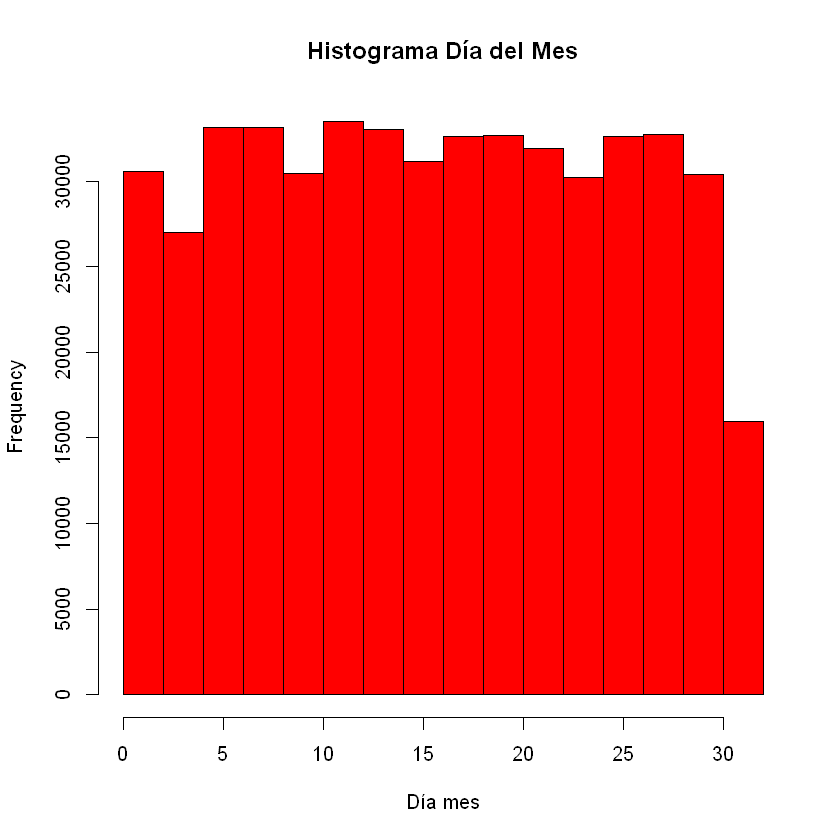

In [7]:
H1<-hist(Y$ DAY_OF_MONTH, main="Histograma Día del Mes", xlab="Día mes", col="red")
H1$breaks
H1$counts
H1$density
H1$mids
H1$xname
H1$equidist


En este caso de estudio todos los vuelos se distribuyen entre todos los días del mes de forma similar.
Nota: la última barra representa al día 31 y 32(no existe) de ahí que sea la mitad que el resto.

### Variable DAY_OF_WEEK

[1] 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5 7.0

[1] 63236 66204     0 65728     0 65125     0 82558     0 70621     0 77726

[1] 0.2574766 0.2695614 0.0000000 0.2676232 0.0000000 0.2651680 0.0000000
 [8] 0.3361496 0.0000000 0.2875460 0.0000000 0.3164752

[1] 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 5.25 5.75 6.25 6.75

[1] "Y$DAY_OF_WEEK"

[1] TRUE

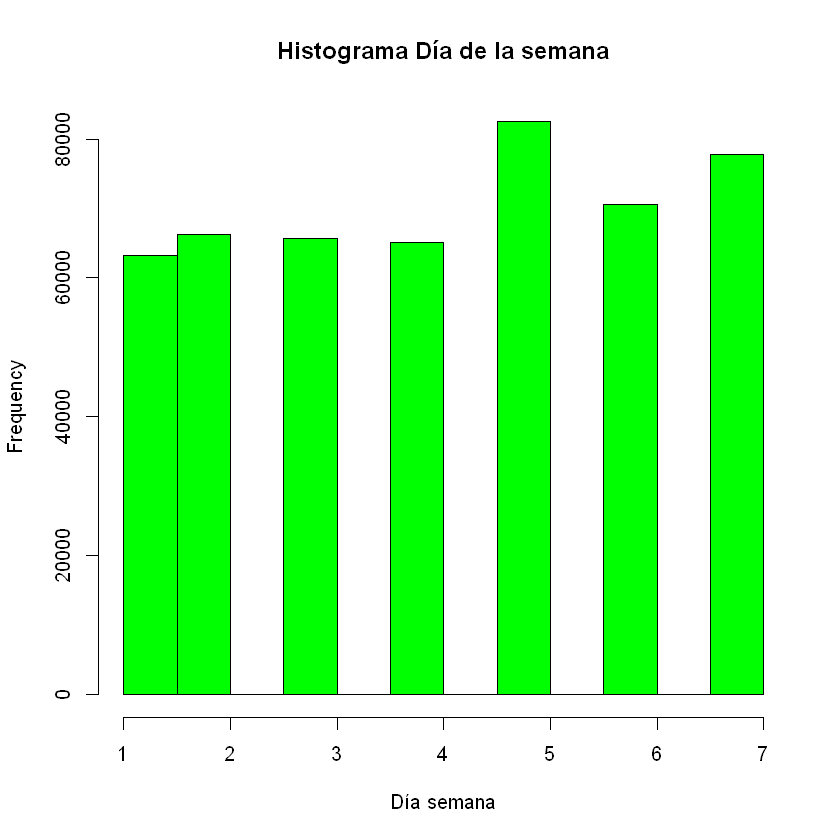

In [8]:
H2<-hist(Y$DAY_OF_WEEK, main="Histograma Día de la semana", xlab="Día semana", col="green")
H2$breaks
H2$counts
H2$density
H2$mids
H2$xname
H2$equidist


Se puede apreciar en el caso en estudio que los vuelos salen todos los días de la semana con mayor actividad los viernes y domingos

### Variable CRS_DEP_TIME_HORA

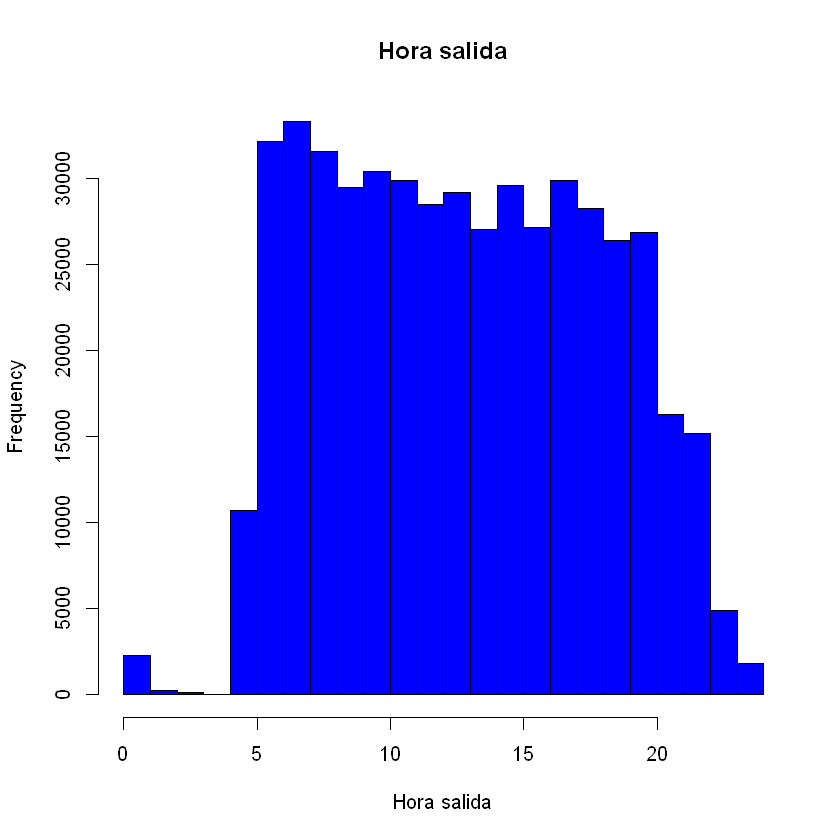

In [9]:
H3<-hist(Y$CRS_DEP_TIME_HORA, main="Hora salida", xlab="Hora salida", col="blue")

Podemos observar que la mayor actividad en la salida de vuelos se produce entre las 6 y las 20h

### Variable DEP_DELAY

[1] -300 -200 -100    0  100  200  300  400  500  600  700  800  900 1000 1100
[16] 1200 1300 1400 1500 1600

[1]      1      0 290307 177326  17219   4337   1193    347    146     81
[11]     46     65     61     36     20      6      3      2      2

[1] 2.035839e-08 0.000000e+00 5.910183e-03 3.610072e-03 3.505511e-04
 [6] 8.829433e-05 2.428756e-05 7.064361e-06 2.972325e-06 1.649030e-06
[11] 9.364859e-07 1.323295e-06 1.241862e-06 7.329020e-07 4.071678e-07
[16] 1.221503e-07 6.107517e-08 4.071678e-08 4.071678e-08

[1] -250 -150  -50   50  150  250  350  450  550  650  750  850  950 1050 1150
[16] 1250 1350 1450 1550

[1] "Y$DEP_DELAY"

[1] TRUE

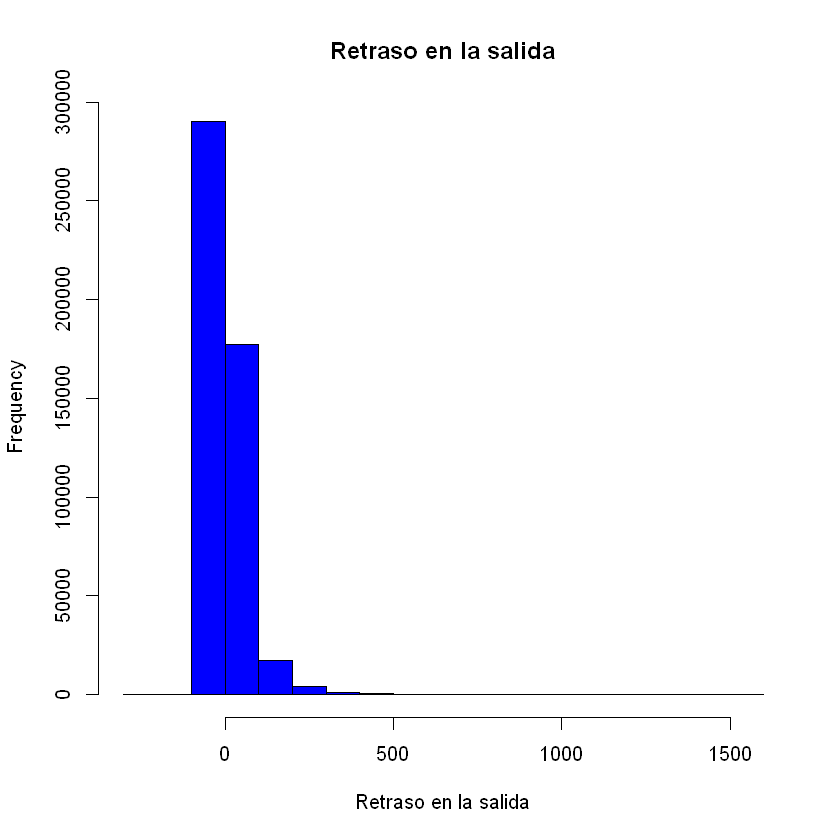

In [71]:
H3<-hist(Y$DEP_DELAY, main="Retraso en la salida", xlab="Retraso en la salida", col="blue")
H3$breaks
H3$counts
H3$density
H3$mids
H3$xname
H3$equidist

Podemos ver que en torno al 60% de los vuelos salen antes de tiempo, en torno al 30% salen a tiempo o con un retraso menor a 50 minutos

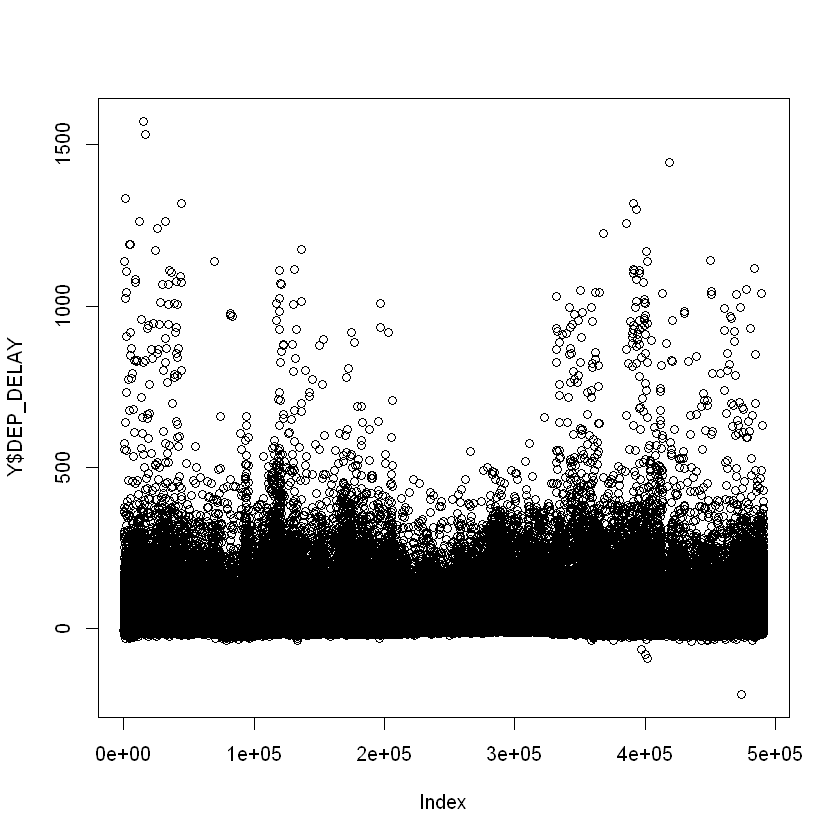

In [72]:
gtotal <-plot(Y$DEP_DELAY)

Confirmamos lo que hemos indicado anteriormente la mayor parte de los vuelos se retrasan en su salida entre 0 y 50-70 minutos

### Cruzamos variables

Vamos a empezar a cruzar variables para determinar cuales son las características que intervienen en los retrasos en los vuelos.
Comenzamos cruzando las variables día de la semana con retrasos en la salida.

In [73]:
# analisis bivariable día de las semana y retraso en la salida
g1<- ggplot(Y, aes(x=DAY_OF_WEEK, y=DEP_DELAY)) + geom_point()

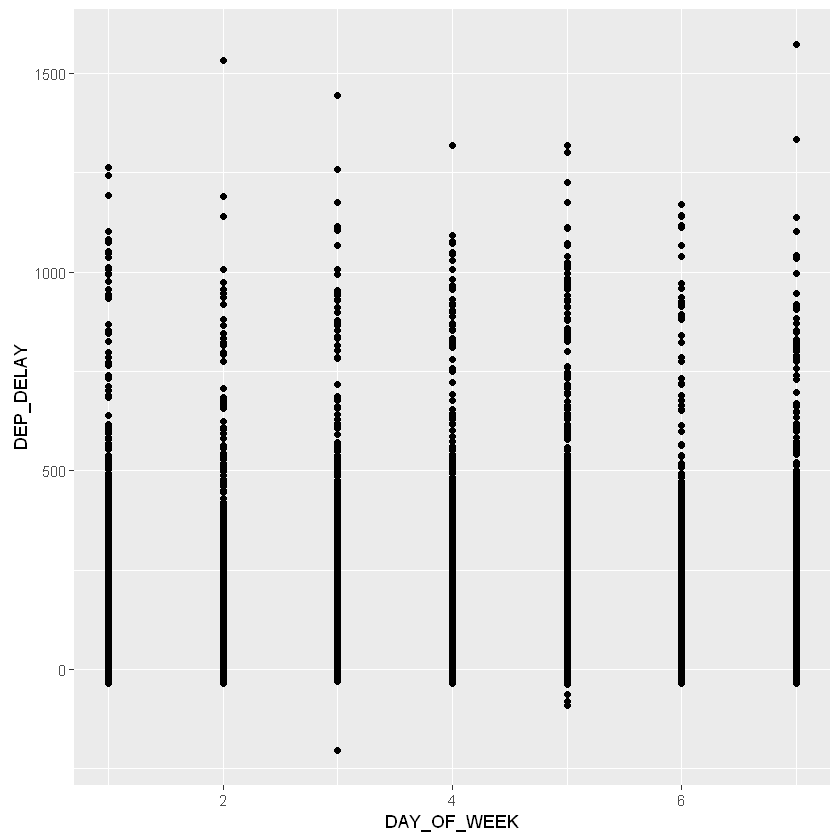

In [17]:
g1

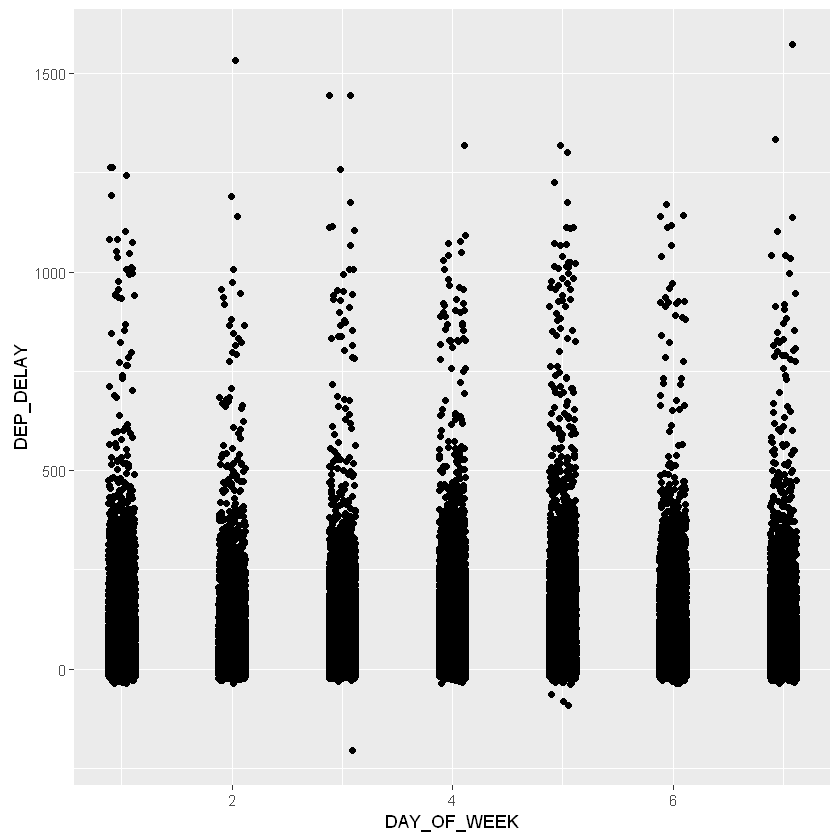

In [18]:
g2<- ggplot(Y, aes(x=DAY_OF_WEEK, y=DEP_DELAY)) + geom_point(position=position_jitter(w=0.3,h=0.3))
g2

Según el gráfico parece que no hay mucha relación entre el día de la semana y los retrasos en las salida del vuelo

Verificamos que esta relación sigue sin apreciarse en los retrasos en las llegadas ya que no se aprecia que haya una relación entre el día de la semana y el retraso en la llegada del vuelo.

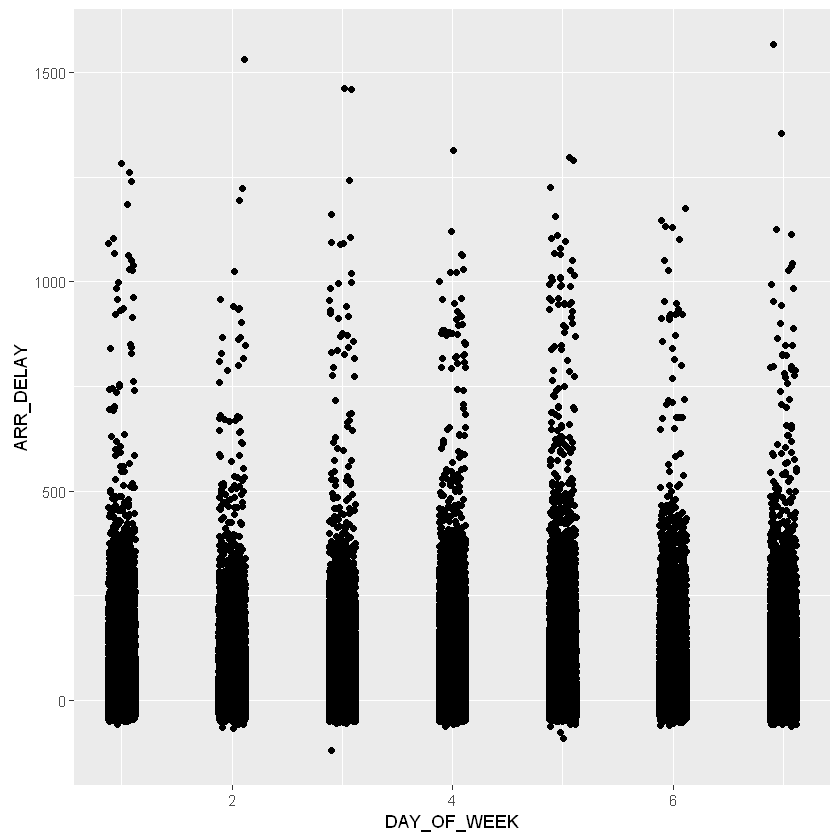

In [19]:
g4<- ggplot(Y, aes(x=DAY_OF_WEEK, y=ARR_DELAY)) + geom_point(position=position_jitter(w=0.3,h=0.3))
g4

Revisamos también la relacion con los días del mes

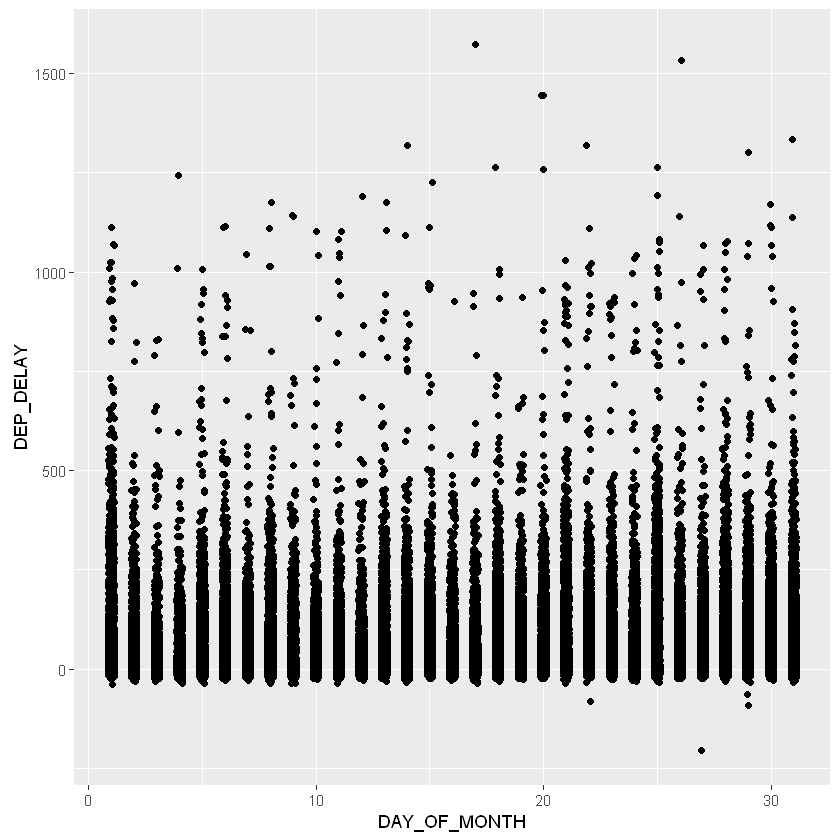

In [31]:
g2<- ggplot(Y, aes(x=DAY_OF_MONTH, y=DEP_DELAY)) + geom_point(position=position_jitter(w=0.3,h=0.3))
g2

Podemos observar que los resultados son similares para todos los días del mes.Quizás algo más de retraso en el día 1 y 31 del mes; y algún día esporádico.

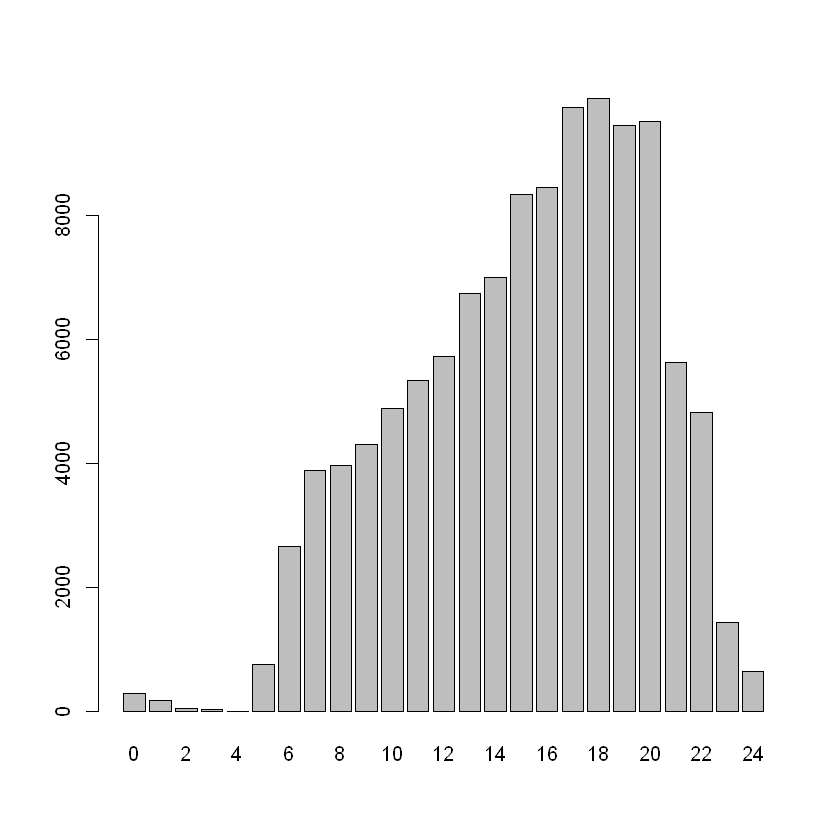

In [75]:
g6<-barplot(by(data=as.numeric(Y$ARR_DEL15),INDICES=Y$CRS_DEP_TIME_HORA,sum),axes=TRUE)

Aquí podemos ver que el mayor número de retrasos se acumulan en los vuelos con una hora de salida prevista por la compañía área entre las 16h y las 20h

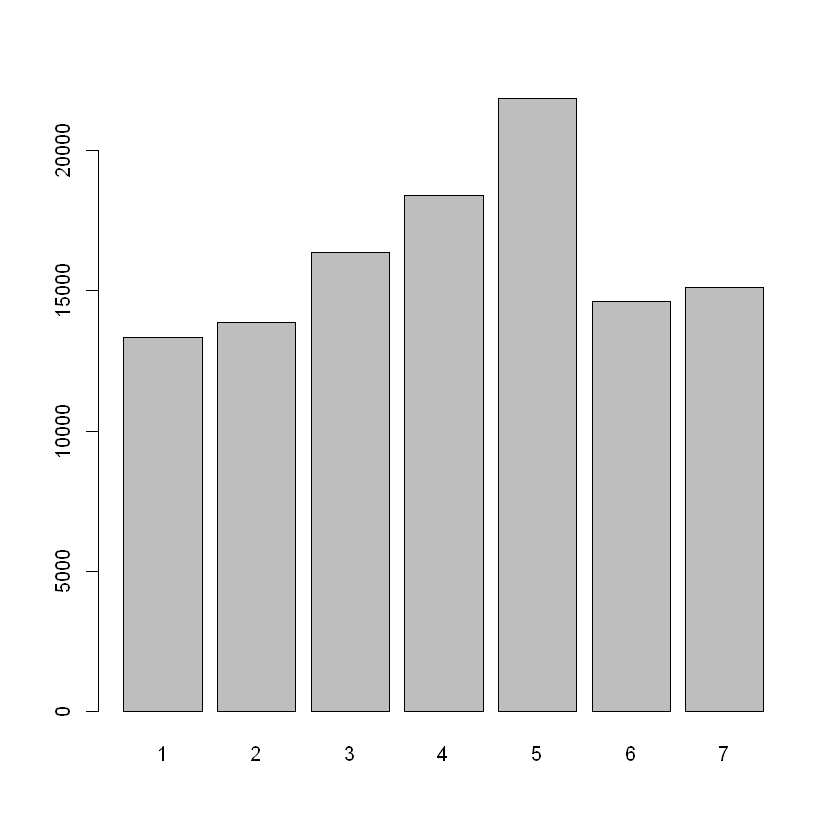

In [76]:
g6<-barplot(by(data=as.numeric(Y$ARR_DEL15),INDICES=Y$DAY_OF_WEEK,sum),axes=TRUE)

Aquí podemos ver que los mayores retrasos se acumulan los viernes

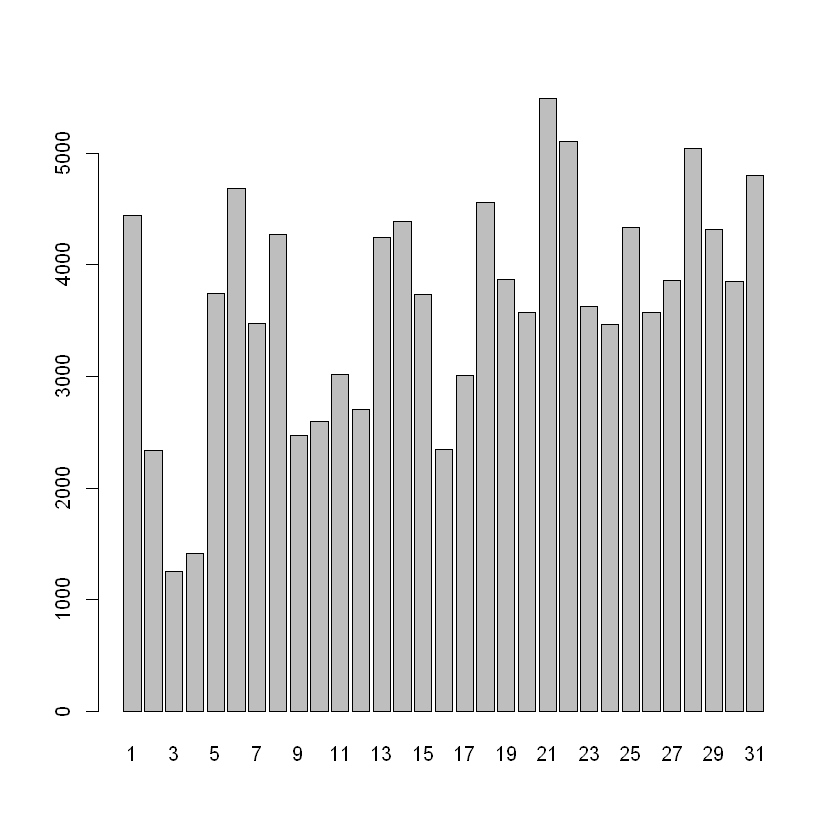

In [77]:
g6<-barplot(by(data=as.numeric(Y$ARR_DEL15),INDICES=Y$DAY_OF_MONTH,sum),axes=TRUE)

Aquí se puede apreciar que existen diferencias de retrasos según el día del mes. Habría que ver si guarda relación con el día de la semana

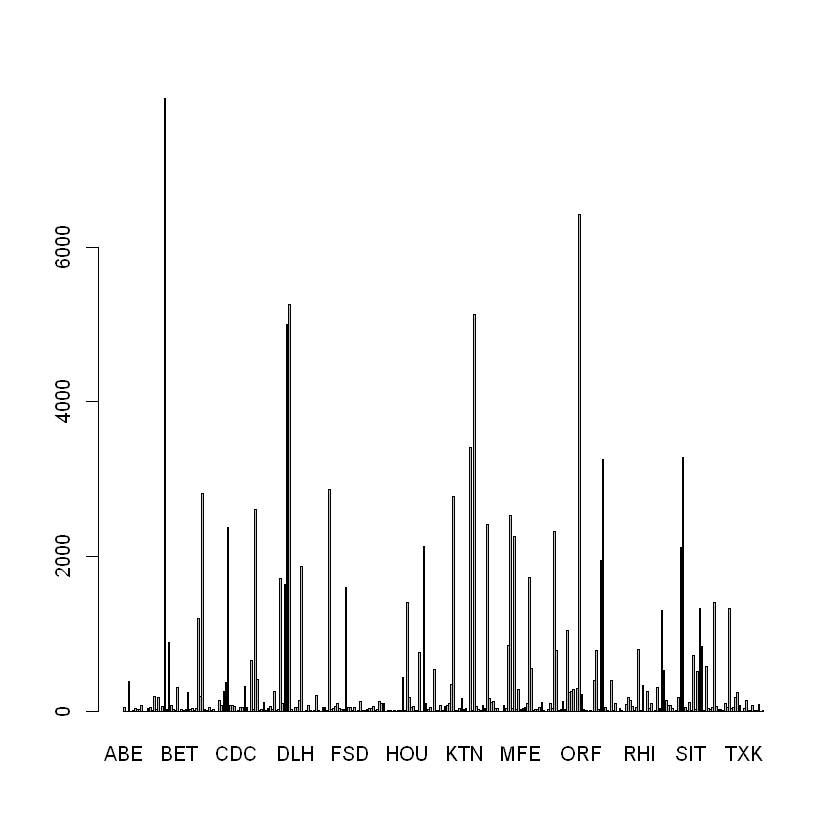

In [80]:
g6<-barplot(by(data=as.numeric(Y$ARR_DEL15),INDICES=Y$ORIGIN,sum),axes=TRUE)

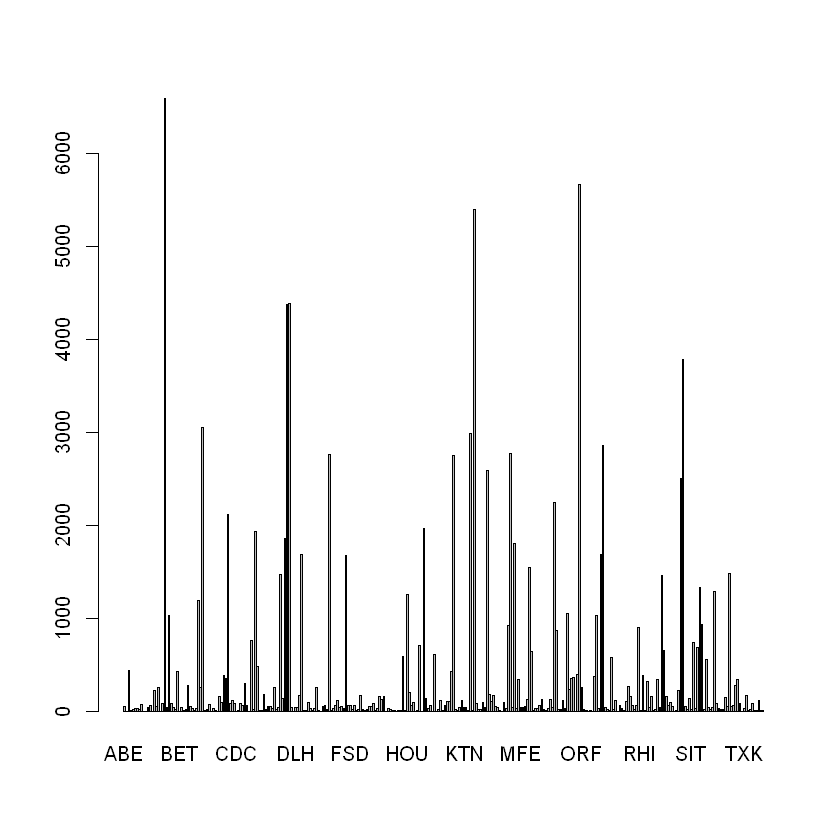

In [81]:
g6<-barplot(by(data=as.numeric(Y$ARR_DEL15),INDICES=Y$DEST,sum),axes=TRUE)

Aquí se puede apreciar que se acumulan diferentes retrasos en función del origen o destino.

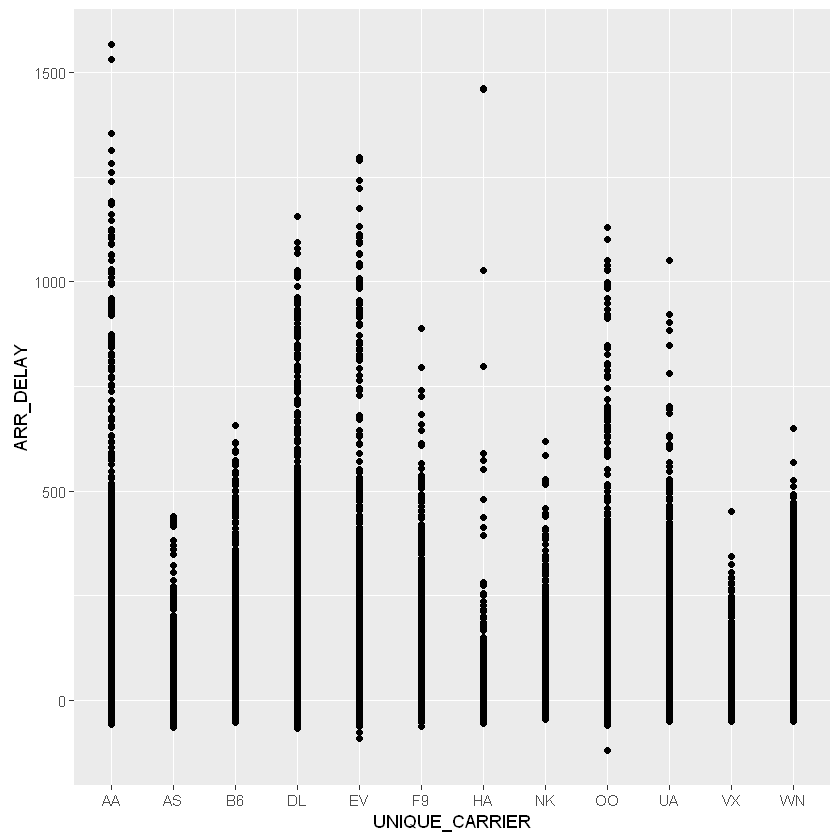

In [26]:
g5<- ggplot(Y, aes(x=UNIQUE_CARRIER, y=ARR_DELAY)) + geom_point()
g5

Aquí podemos ver cuales son las compañias que acumulan más tiempo de retraso en la llegada. Vamos a realizar una prueba más incluyendo la distancia

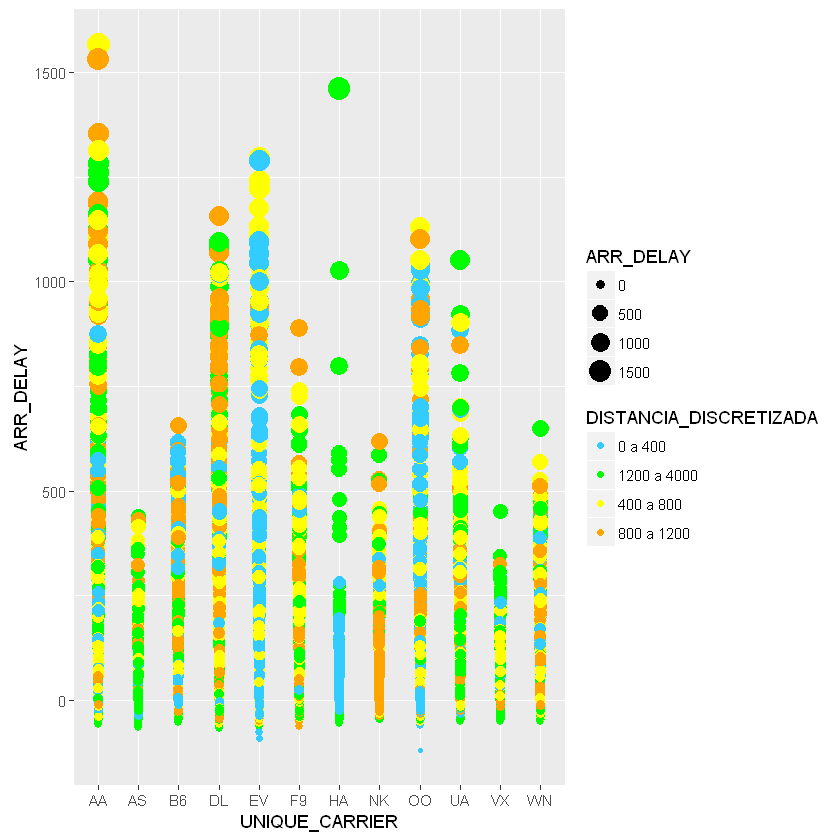

In [27]:
g5<- ggplot(Y, aes(x=UNIQUE_CARRIER, y=ARR_DELAY, color=DISTANCIA_DISCRETIZADA)) + geom_point(aes(size=ARR_DELAY))+scale_color_manual(values=c("#33CCFF", "green","yellow","orange","red","#660066"))
g5

Los resultados son dispares y diferentes para cada compañía. Mientras que hay compañías como HA que parece que si podríamos indicar que a mayor distancia del vuelo mayores retrasos, hay otras en las que aparentemente parece que no hay una relación directa entre la distancia y el retraso. 

### Relación entre la variable retraso y la duración real de los vuelos, la duración estimada por la compañía del vuelo, los retrasos en la salida y la distancia

In [51]:
tapply(Y$ACTUAL_ELAPSED_TIME,Y$RETRASADO,mean)

No       Si 
139.1984 153.1653

In [52]:
tapply(Y$CRS_ELAPSED_TIME, Y$RETRASADO, mean)

No       Si 
146.1512 149.7513

In [53]:
tapply(Y$DEP_DELAY, Y$RETRASADO, mean)

No         Si 
-0.9844464 67.8682582

In [54]:
tapply(Y$DISTANCE, Y$RETRASADO, mean)

No       Si 
869.6138 890.2200

In [1]:
tapply(Y$CRS_DEP_TIME_HORA, Y$RETRASADO, mean)

No       Si 
12.85346 15.29080

Aquí podemos apreciar que no hay demasiada diferencia en la distancia, ni en el tiempo real de vuelo o el tiempo estimado por la compañía de vuelo entre vuelos que se retrasan y vuelos que no se retrasan.
Como era de esperar, los vuelos que se retrasan tienen una media de retraso en la salida mucho mayor que los que no se retrasan que es prácticamente nula.

### c.2) Eliminar características redundantes

Relativas a los retrasos en la salida y en la llegada solo tomamos las variales DEP_DELAY y ARR_DELAY, ya que hay varias variables que representan lo mismo medido de forma diferente.

### Seleccionamos las características

In [34]:
newVuelo<-Y[,c(3:5,8:12,16:20,26,27,28,30)]
head(newVuelo)

,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
1,1,5,AA,BOS,JFK,600,554,-6,15,9,711,707,-4,71,73,49,187
2,2,6,AA,BOS,JFK,600,554,-6,25,3,711,703,-8,71,69,41,187
3,4,1,AA,BOS,JFK,600,601,1,17,9,711,706,-5,71,65,39,187
4,5,2,AA,BOS,JFK,600,556,-4,29,10,711,709,-2,71,73,34,187
5,6,3,AA,BOS,JFK,600,552,-8,21,5,711,659,-12,71,67,41,187
6,7,4,AA,BOS,JFK,600,555,-5,26,6,711,716,5,71,81,49,187


### Transformamos las variables no numéricas en numéricas

In [35]:
newVuelo$UNIQUE_CARRIER<-as.numeric(Y$UNIQUE_CARRIER)

In [36]:
newVuelo$ORIGIN<-as.numeric(Y$ORIGIN)

In [37]:
newVuelo$DEST<-as.numeric(Y$DEST)

In [38]:
head(newVuelo)

,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
1,1,5,1,38,157,600,554,-6,15,9,711,707,-4,71,73,49,187
2,2,6,1,38,157,600,554,-6,25,3,711,703,-8,71,69,41,187
3,4,1,1,38,157,600,601,1,17,9,711,706,-5,71,65,39,187
4,5,2,1,38,157,600,556,-4,29,10,711,709,-2,71,73,34,187
5,6,3,1,38,157,600,552,-8,21,5,711,659,-12,71,67,41,187
6,7,4,1,38,157,600,555,-5,26,6,711,716,5,71,81,49,187


### Calculamos la matriz de correlación 

In [39]:
correlationMatrix<-cor(newVuelo)

In [40]:
print(correlationMatrix)



                     DAY_OF_MONTH   DAY_OF_WEEK UNIQUE_CARRIER       ORIGIN
DAY_OF_MONTH         1.000000e+00  0.0575593349   -0.003640665 -0.001277938
DAY_OF_WEEK          5.755933e-02  1.0000000000   -0.002622774  0.003900652
UNIQUE_CARRIER      -3.640665e-03 -0.0026227739    1.000000000  0.067198707
ORIGIN              -1.277938e-03  0.0039006520    0.067198707  1.000000000
DEST                -1.546594e-03  0.0039673086    0.067363660  0.016852109
CRS_DEP_TIME         3.226955e-03  0.0043306291   -0.003690885 -0.031874883
DEP_TIME             5.900995e-03  0.0040182261    0.007705685 -0.030387063
DEP_DELAY            6.011705e-02 -0.0050292405    0.006614730 -0.026237868
TAXI_OUT             2.965941e-02 -0.0324218799   -0.193373878 -0.035148025
TAXI_IN              3.175415e-02  0.0006233404   -0.095294249  0.043111975
CRS_ARR_TIME        -5.853904e-04  0.0063936191   -0.014816063 -0.003485451
ARR_TIME            -8.219877e-03  0.0070346279   -0.011818149  0.005535802
ARR_DELAY   

### Seleccionamos las variables que tienen una mayor correlación dibujamos.

In [42]:
maxCorrelacion <- findCorrelation(correlationMatrix,cutoff=0.80)
print(maxCorrelacion)

[1] 15 14 16  7 11 13


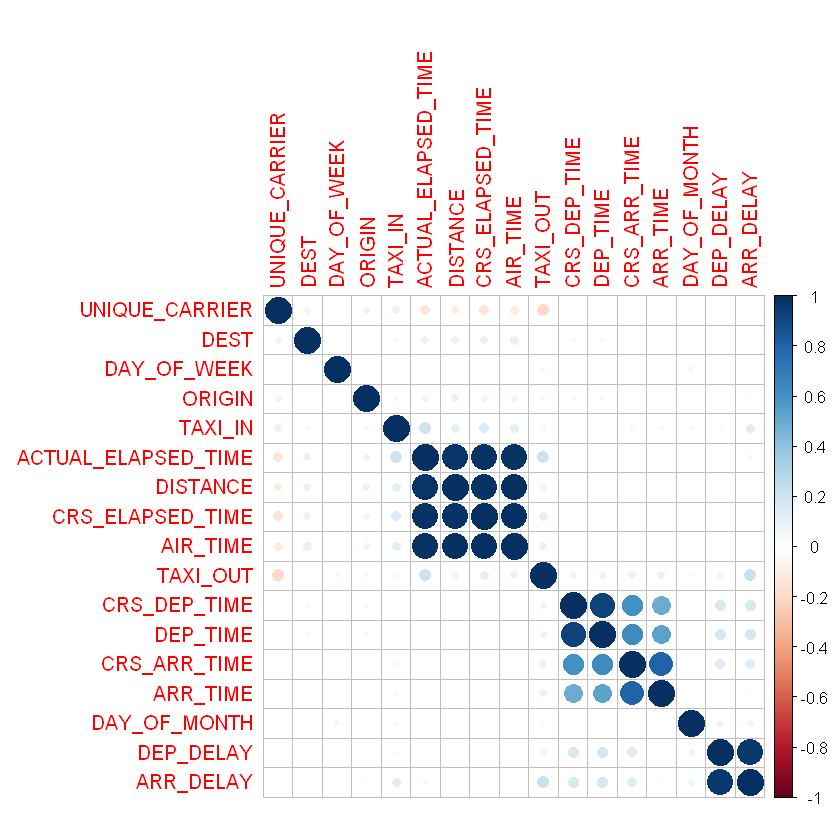

In [43]:
corrplot (correlationMatrix, order="hclust")

Se puede deducir de este gráfico que entre las variables ACTUAL_ELAPSED_TIME, DISTANCE,CRS_ELAPSED_TIME y AIR_TIME hay una fuerte correlación y por tanto podemos eliminar 3 de ellas y quedarnos con una sola. En este caso nos quedamos con DISTANCE.

Lo mismo ocurre con CRS_DEP_TIME y DEP_TIME. Podemos eliminar DEP_TIME y quedaría representada por CRS_DEP_TIME. 

También existe una coorelación fuerte entre DEP_DELAY y ARR_DELAY, por lo que eliminaremos ARR_DELAY quedando esta representada por DEP_DELAY.

Hay una correlación moderada entre CRS_ARR_TIME y ARR_TIME. 

Procedemos a filtrar y repetimos el gráfico, observando que desaparecen las características reduntantes. 

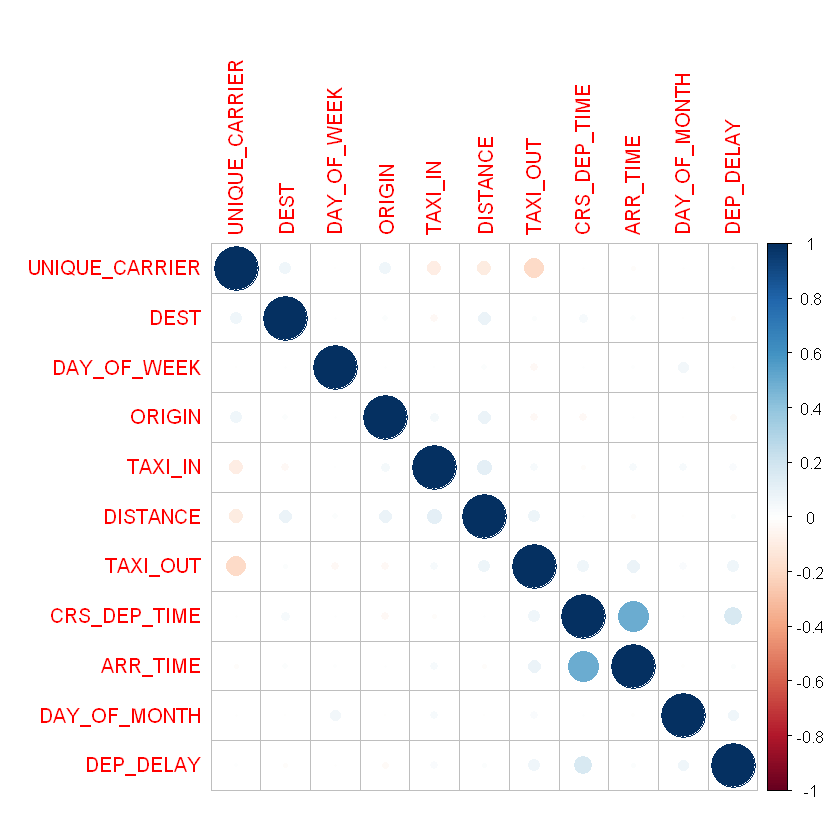

In [44]:
Rfilter <- newVuelo[,-maxCorrelacion]
newVuelo.new <- cor(Rfilter)
corrplot(newVuelo.new, order = "hclust")

### c.3) Puntuamos caracteristicas por importancia

Una vez eliminadas las características redundantes vamos a ver cuales son las características más importantes.

In [ ]:
R <- Y[,c(3:5,8:10,12,16,17,19,30,39)]
head(R)
control <- trainControl(method="repeatedcv",number=30,repeats=10)
model <- train (RETRASADO~.,data =R,method="lvq",preProcess="scale",trControl=control)
Rimp <- varImp(model, scale=FALSE)
print(Rimp)
plot(Rimp)

,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,DISTANCE,RETRASADO
1,1,5,AA,BOS,JFK,600,-6,15,9,707,187,No
2,2,6,AA,BOS,JFK,600,-6,25,3,703,187,No
3,4,1,AA,BOS,JFK,600,1,17,9,706,187,No
4,5,2,AA,BOS,JFK,600,-4,29,10,709,187,No
5,6,3,AA,BOS,JFK,600,-8,21,5,659,187,No
6,7,4,AA,BOS,JFK,600,-5,26,6,716,187,No


Loading required package: class
Warning message in match(x, levels):
"Reached total allocation of 6091Mb: see help(memory.size)"Warning message in match(x, levels):
"Reached total allocation of 6091Mb: see help(memory.size)"Warning message in FUN(X[[i]], ...):
"Reached total allocation of 6091Mb: see help(memory.size)"Warning message in FUN(X[[i]], ...):
"Reached total allocation of 6091Mb: see help(memory.size)"Warning message in FUN(X[[i]], ...):
"Reached total allocation of 6091Mb: see help(memory.size)"Warning message in FUN(X[[i]], ...):
"Reached total allocation of 6091Mb: see help(memory.size)"Warning message in apply(x[, method$scale, drop = FALSE], 2, sd, na.rm = na.remove):
"Reached total allocation of 6091Mb: see help(memory.size)"Warning message in apply(x[, method$scale, drop = FALSE], 2, sd, na.rm = na.remove):
"Reached total allocation of 6091Mb: see help(memory.size)"Warning message in apply(x[, method$scale, drop = FALSE], 2, sd, na.rm = na.remove):
"Reached total allo

Debido a que el modelo de datos tiene un volumen de más de 500.000 registros y requiere mucha memoria para alocarlo, vamos a reducir el volumen de datos utilizando solo los vuelos que tienen como destino el aeropuerto JFK. A este aeropuerto vuelan diferentes compañías, de diferentes orígenes y los vuelos son de diferentes distancias y cubren todos los días y horas de salida.  

In [1]:
vuelosJFK <- read.csv(file="RetrasosVuelosJFK.csv",comment.char = "#", sep=";")
head(vuelosJFK)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,RETRASADO,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA
1,2016,7,1,5,AA,N793AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
2,2016,7,2,6,AA,N784AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
3,2016,7,4,1,AA,N785AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
4,2016,7,5,2,AA,N790AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
5,2016,7,6,3,AA,N799AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
6,2016,7,7,4,AA,N786AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6


In [12]:
Y<-vuelosJFK[!is.na(vuelosJFK$ARR_DEL15),]
R <- Y[,c(3:5,8,10,12,16,17,19,30,39)]
head(R)
nrow(R)

,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,DISTANCE,RETRASADO
1,1,5,AA,BOS,600,-6,15,9,707,187,No
2,2,6,AA,BOS,600,-6,25,3,703,187,No
3,4,1,AA,BOS,600,1,17,9,706,187,No
4,5,2,AA,BOS,600,-4,29,10,709,187,No
5,6,3,AA,BOS,600,-8,21,5,659,187,No
6,7,4,AA,BOS,600,-5,26,6,716,187,No


[1] 1505

In [13]:
control <- trainControl(method="repeatedcv",number=30,repeats=10)


In [14]:
model <- train (RETRASADO~.,data =R,method="lvq",preProcess="scale",trControl=control)

ROC curve variable importance

               Importance
DEP_DELAY          0.9584
CRS_DEP_TIME       0.7390
ARR_TIME           0.6194
TAXI_IN            0.6107
TAXI_OUT           0.6050
ORIGIN             0.5569
DISTANCE           0.5477
DAY_OF_MONTH       0.5381
DAY_OF_WEEK        0.5196
UNIQUE_CARRIER     0.4762


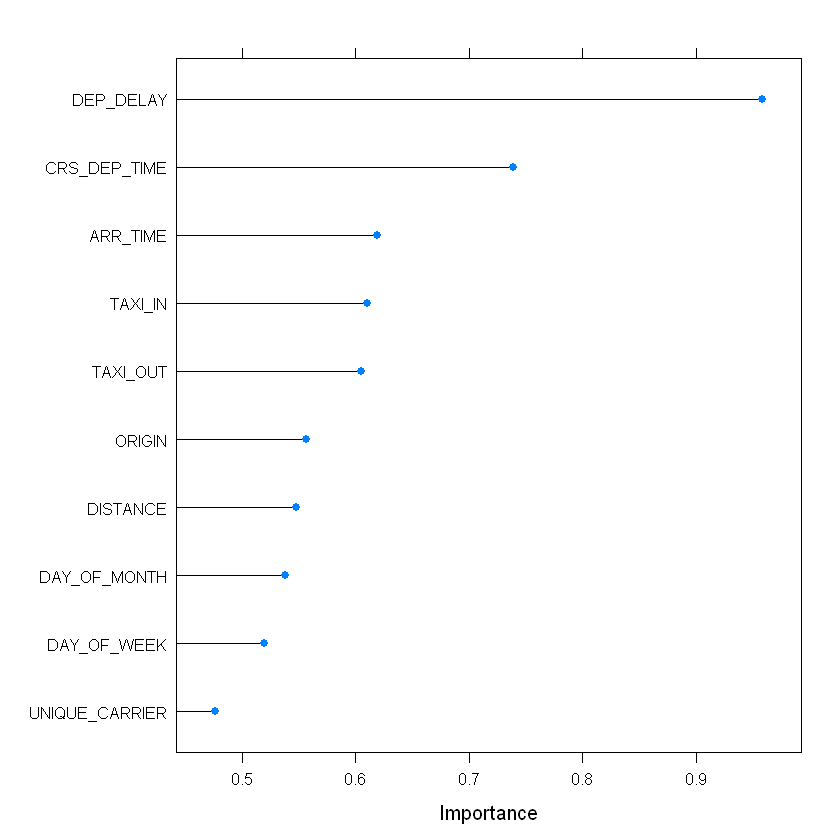

In [15]:

Rimp <- varImp(model, scale=FALSE)
print(Rimp)
plot(Rimp)

Observando este gráfico podemos escoger las variables más importantes y descargar el resto. En este caso descartaríamos el día de la semana, el día del mes y la compañía.

### c.4) Análisis de componentes principales

De las variables más importantes vamos a seleccionar CRS_DEP_TIME,ARR_TIME,TAXI_IN y TAXI_OUT para el análisis de componentes principales

In [64]:
vueloCP<-Y[,c(10,16,17,19)]
head(vueloCP)

,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,ARR_TIME
1,600,15,9,707
2,600,25,3,703
3,600,17,9,706
4,600,29,10,709
5,600,21,5,659
6,600,26,6,716


In [65]:
Xpca<-princomp(vueloCP)

In [66]:
Xpca

Call:
princomp(x = vueloCP)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4 
626.206954 417.118248  10.513421   6.405681 

 4  variables and  1505 observations.

In [67]:
summary(Xpca)

Importance of components:
                            Comp.1      Comp.2       Comp.3       Comp.4
Standard deviation     626.2069543 417.1182479 1.051342e+01 6.4056808967
Proportion of Variance   0.6924826   0.3072497 1.951917e-04 0.0000724609
Cumulative Proportion    0.6924826   0.9997323 9.999275e-01 1.0000000000

Como se puede apreciar en los resultados anteriores podemos reducir dimensionalidad pasando de 4 variables a 2, ya que nos quedaríamos con los dos primeros componentes y no perderíamos practicamente nada de información. 
Hemos reducido un espacio 4-dimensional formado por 4 variables de origen CRS_DEP_TIME,ARR_TIME,TAXI_IN y TAXI_OUT a 2 variables. 

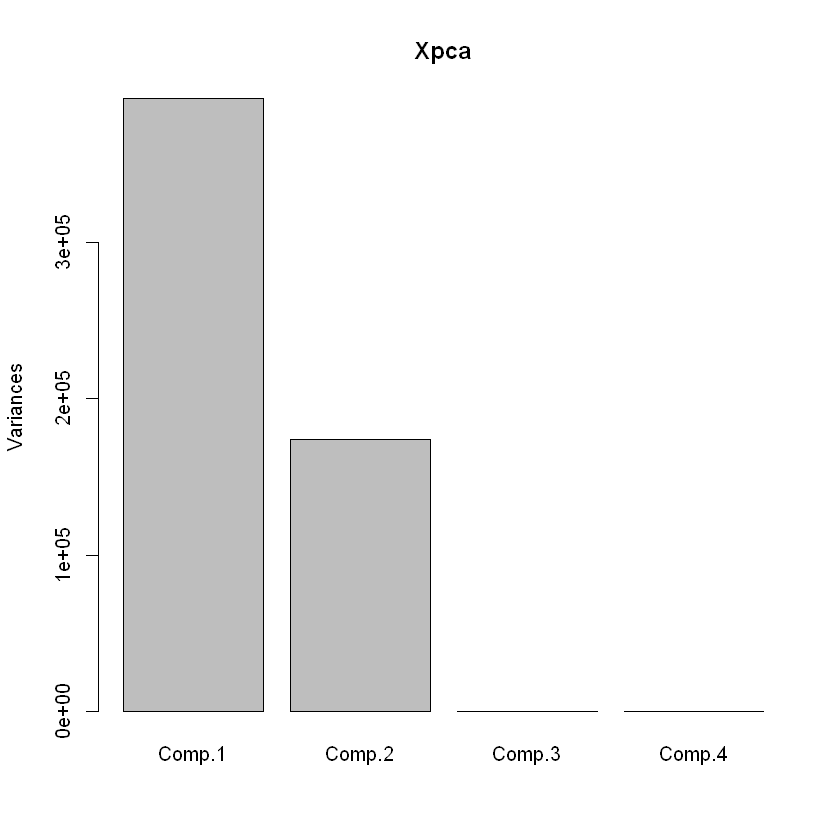

In [68]:
screeplot(Xpca)

In [72]:
retraso<-Y[,39]
Xscores=(Xpca$scores)


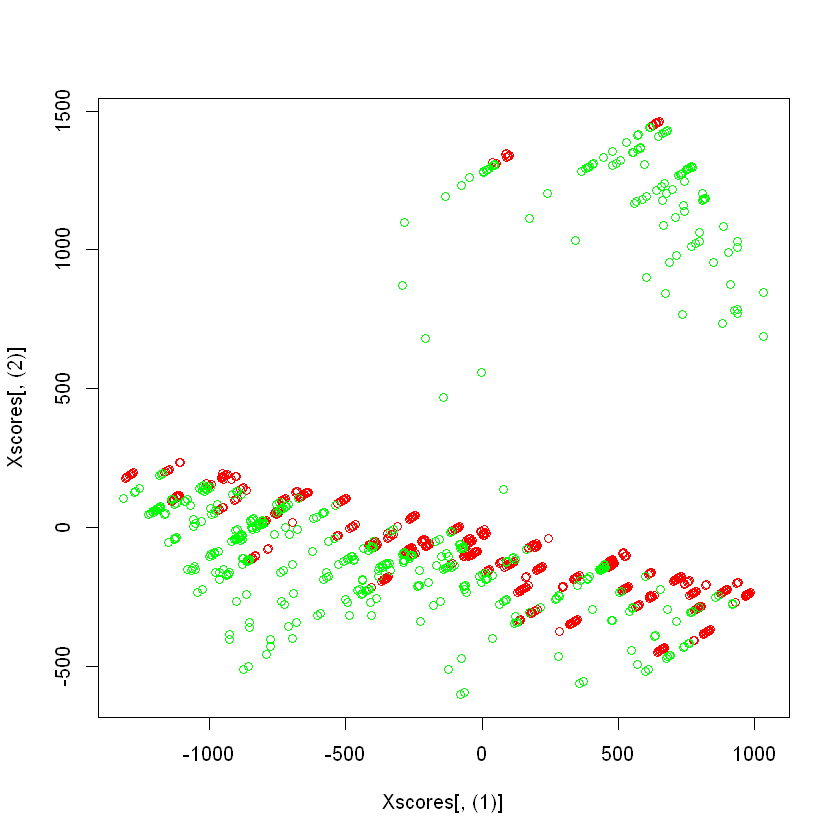

In [73]:
plot(Xscores[,(1)],Xscores[,(2)])
points(Xscores[retraso=="No" ,1],Xscores[retraso =="No",2],col="red")
points(Xscores [retraso=="Si",1],Xscores[retraso =="Si",2],col="green")

Se ha pintado en rojo los vuelos que no se retrasan y en verde los que si.

En este gráfico no es sencillo diferenciar los vuelos que se retrasan de los que no, ya que existe solapamiento en gran medida. Interpretando el resultado podemos indicar que cuando Comp2 toma el valor entre 250 y 1400 los vuelos se retrasan. También existe otra combinación de un valor de Comp1 de 0 o menor de 0 y un valor de Comp2 menor de -250 que indica que los vuelos se retrasan. 

Utilizamos ahora la distancia y el origen (ORIGIN Y DISTANCE) para otro análisis de componentes principales

In [57]:
vueloCP<-Y[,c(8,30)]
vueloCP$ORIGIN<-as.numeric(Y$ORIGIN)
head(vueloCP)
Xpca<-princomp(vueloCP)
Xpca
summary(Xpca)

,ORIGIN,DISTANCE
1,5,187
2,5,187
3,5,187
4,5,187
5,5,187
6,5,187


Call:
princomp(x = vueloCP)

Standard deviations:
    Comp.1     Comp.2 
494.889388   1.650764 

 2  variables and  1505 observations.

Importance of components:
                            Comp.1       Comp.2
Standard deviation     494.8893876 1.650764e+00
Proportion of Variance   0.9999889 1.112625e-05
Cumulative Proportion    0.9999889 1.000000e+00

Como se puede apreciar en los resultados anteriores podemos reducir dimensionalidad pasando de 2 variables a 1, ya que nos quedaríamos con el primer componente y no perderíamos practicamente nada de información.  

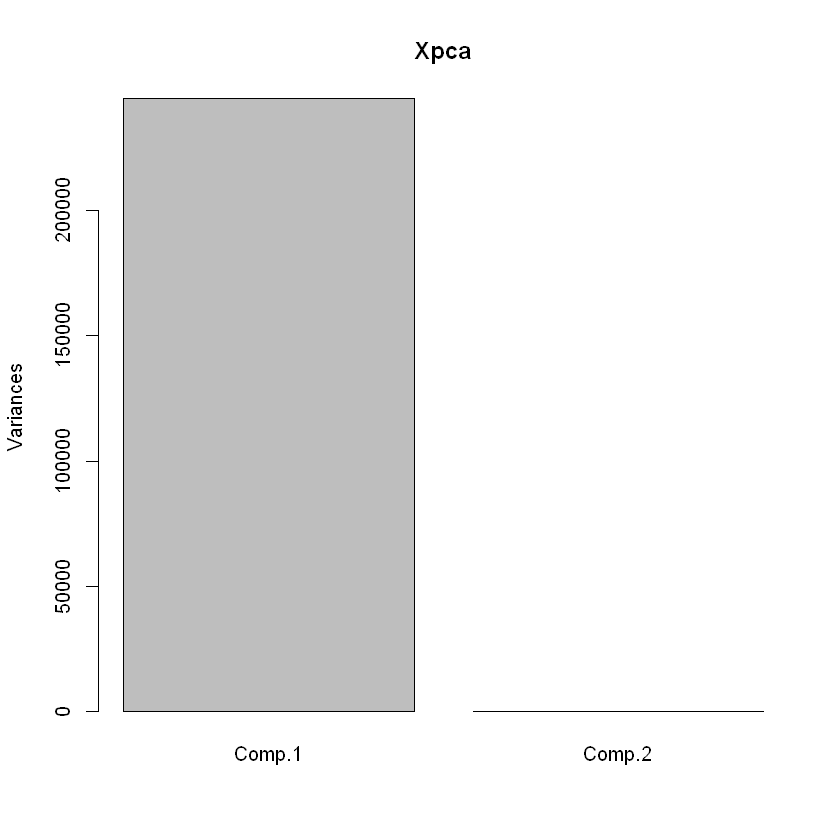

In [58]:
screeplot(Xpca)

### c.5) Descomposición en valores singulares

Para la descomposición en valores singulares vamos a utilizar las mismas variables que el algoritmo de componentes principales CRS_DEP_TIME,ARR_TIME,TAXI_IN y TAXI_OUT 

In [77]:
vueloSV<-Y[,c(10,16,17,19,39)]
head(vueloSV)

,CRS_DEP_TIME,TAXI_OUT,TAXI_IN,ARR_TIME,RETRASADO
1,600,15,9,707,No
2,600,25,3,703,No
3,600,17,9,706,No
4,600,29,10,709,No
5,600,21,5,659,No
6,600,26,6,716,No


In [79]:
vueloSV.order<-vueloSV

In [80]:
vueloSV.svd<-svd(vueloSV.order[,c(1:4)])

In [81]:
vueloSV.svd$d
head(vueloSV.svd$u)
vueloSV.svd$v

[1] 75579.6387 16535.7247   446.1913   251.1251

-0.012260383,0.002291510,0.017391127,0.009735072
-0.01222224,0.00212725,0.03547883,-0.02386081
-0.012250890,0.002250280,0.021724896,0.007623418
-0.012281556,0.002371609,0.048210995,-0.001228013
-0.011793833,0.000324123,0.028569787,-0.011853141
-0.012349038,0.002659472,0.039263140,-0.013430067


-0.677653168,-0.735324401,-0.008647749,-0.003070100
-0.008897517,-0.002030170,0.964085883,-0.265433838
-0.005048482,-0.002493981,0.265392493,0.964124016
-0.7353104998,0.6777076681,-0.0055182475,-0.0005782563


In [82]:
sum(vueloSV.svd$d)
var=sum(vueloSV.svd$d[1])
var
var/sum(vueloSV.svd$d)

[1] 92812.68

[1] 75579.64

[1] 0.8143245

Observamos que obtenemos un valor del 81% por lo que podemos plantear quedarnos con el primer factor

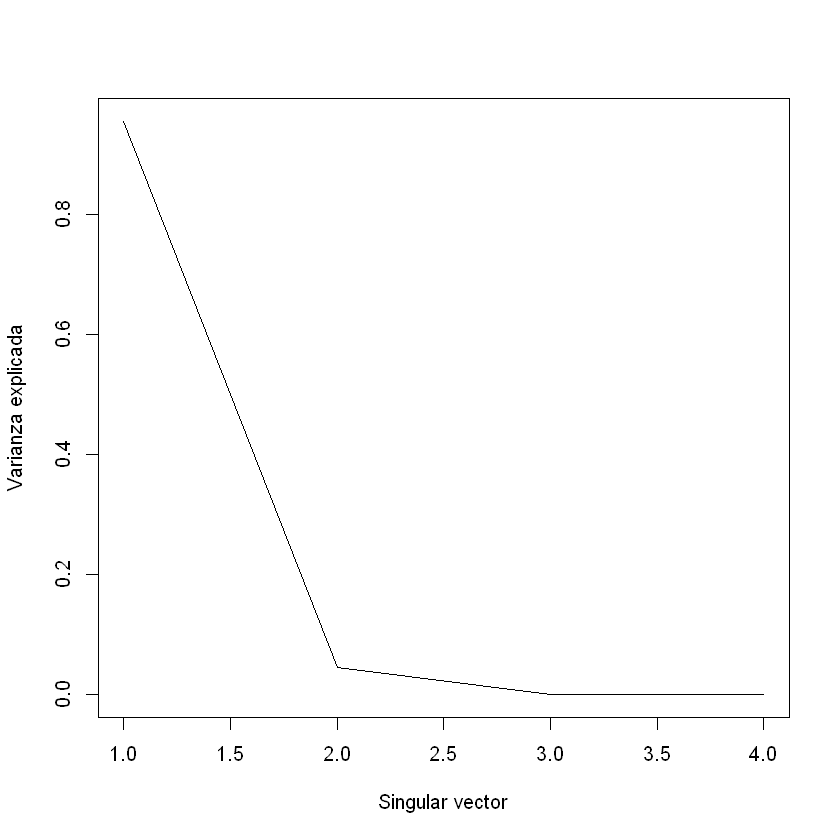

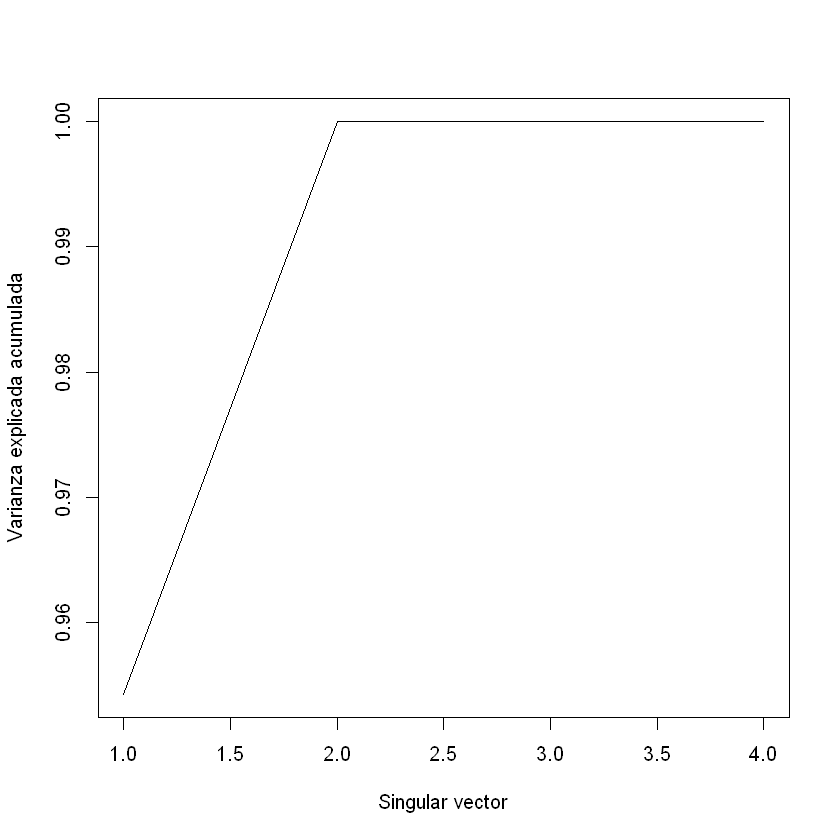

In [84]:
plot(vueloSV.svd$d^2/sum(vueloSV.svd$d^2),type="l",xlab="Singular vector",ylab="Varianza explicada")
plot(cumsum(vueloSV.svd$d ^2/sum(vueloSV.svd$d^2)),type="l",xlab="Singular vector",ylab="Varianza explicada acumulada")

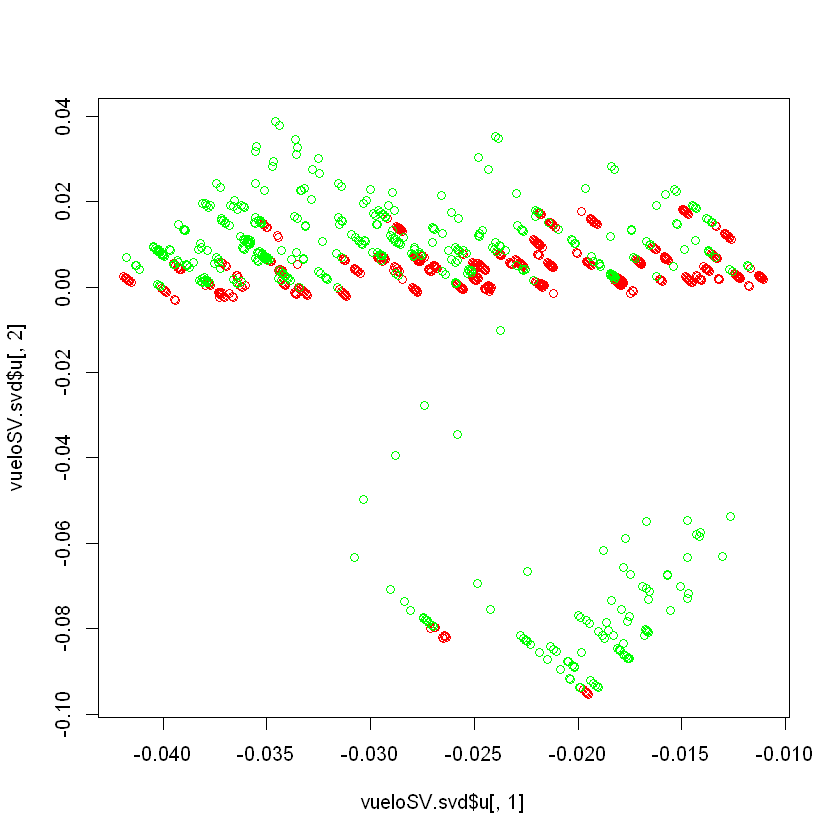

In [87]:
retraso<-vueloSV.order[,5]
plot(vueloSV.svd$u[,1],vueloSV.svd$u[,2])
# Asignamos rojo a no retrasado y verde a si retrasado
points(vueloSV.svd$u[retraso=="No",1],vueloSV.svd $u[retraso=="No",2],col="red")
points(vueloSV.svd $u[retraso =="Si",1],vueloSV.svd$u[retraso=="Si" ,2] , col="green")

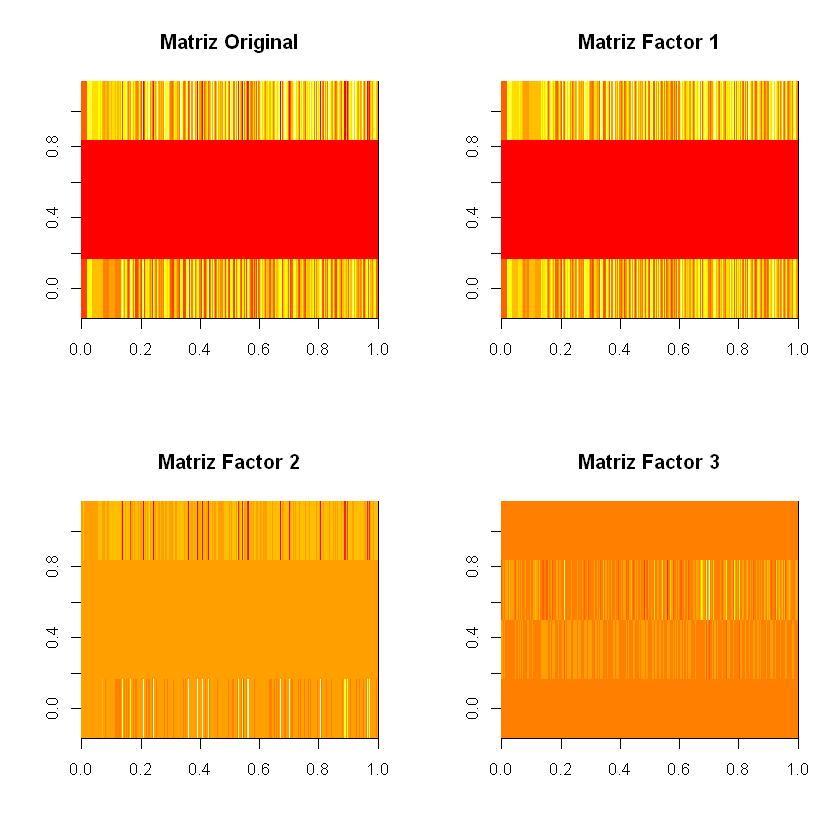

In [88]:
vueloSV.recon1 =vueloSV.svd$u[ ,1]%*% diag(vueloSV.svd$d[1],length(1),length(1))%*%t(vueloSV.svd$v[ ,1])
vueloSV.recon2 =vueloSV.svd$u[ ,2]%*% diag(vueloSV.svd$d [2],length(2),length(2))%*%t(vueloSV.svd$v[ ,2])
vueloSV.recon3 =vueloSV.svd$u[ ,3]%*%diag(vueloSV.svd$d [3],length(3),length(3))%*%t(vueloSV.svd$v[ ,3])
vueloSV.recon3 =vueloSV.svd$u[ ,4]%*%diag(vueloSV.svd$d [4],length(4),length(4))%*%t(vueloSV.svd$v[ ,4])
par(mfrow=c(2,2))
image(as.matrix(vueloSV.order[,c (1:4) ]) , main =" Matriz Original ")
image(vueloSV.recon1 , main =" Matriz Factor 1 ")
image(vueloSV.recon2 , main =" Matriz Factor 2 ")
image(vueloSV.recon3 , main =" Matriz Factor 3 ")

Podemos observar como la representación de la matriz original y la generada con el primer factor se parecen mucho, mientras que con el resto de factores pierde mucho.

# d) Arboles de decisión

# d.1) Creación del arbol de decisión del conjunto de datos original

### Se lee el conjunto de datos original

In [16]:
Y <- read.csv(file="RetrasosVuelosJFK.csv",comment.char = "#", sep=";")
vuelosJFK<-Y[!is.na(Y$ARR_DEL15),]

head(vuelosJFK)
dim(vuelosJFK)


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,RETRASADO,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA
1,2016,7,1,5,AA,N793AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
2,2016,7,2,6,AA,N784AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
3,2016,7,4,1,AA,N785AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
4,2016,7,5,2,AA,N790AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
5,2016,7,6,3,AA,N799AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
6,2016,7,7,4,AA,N786AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6


[1] 1505   41

### Reordenamos datos al azar

In [17]:
vuelosJFK <- vuelosJFK[sample(nrow(vuelosJFK)),]

### Escogemos las variables que utilizaremos para construir el árbol. 

Basandonos en el estudio de las características realizado anteriormente seleccionamos las características una vez eliminadas las variables con fuertes correlaciones. Además se ha utilizado la distancia discretizada para no tener valores muy dispersos. También se ha utilizado la variable CRS_DEP_TIME_HORA que se creó solo con el valor de la hora (sin incluir minutos) para no tener valores muy dispersos.

In [18]:
X<-vuelosJFK[,c(3:5,8,12,16,17,19,39,40,41)]
head(X)

,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,RETRASADO,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA
868,29,5,B6,BOS,-5,21,15,2212,No,0 a 400,21
642,23,6,B6,BOS,-1,26,9,1356,No,0 a 400,12
524,12,2,B6,MCO,4,13,4,2226,No,800 a 1200,20
1475,30,6,DL,ATL,94,19,20,135,Si,400 a 800,21
364,7,4,B6,MCO,251,12,7,2010,Si,800 a 1200,13
1448,28,4,DL,ATL,11,16,10,1609,No,400 a 800,13


### Particionamos el conjunto de entrada en dos (training y test set), según la regla del 2/3

In [19]:
train<-X[1:1000,]
test<-X[1001:1505,]

### Revisamos que haya una representación parecida de la variable clasificadora en el conjunto de entreno y test

In [20]:
prop.table(table(train$RETRASADO))
prop.table(table(test$RETRASADO))


   No    Si 
0.655 0.345 


       No        Si 
0.6772277 0.3227723 

Tienen proporciones parecidas.

### Asignamos la variable de clasificación en ambos conjuntos.

In [21]:
trainX<-train[,c(1:8,10:11)]
trainY<-train[,c(9)]
testX<-test[,c(1:8,10:11)]
testY<-test[,c(9)]

### Creamos el árbol con todas las variables y lo dibujamos

In [22]:
#generamos el modelo y obervamos el resultado
model<-C50::C5.0(trainX,trainY)
summary(model)
model


Call:
C5.0.default(x = trainX, y = trainY)


C5.0 [Release 2.07 GPL Edition]  	Sat Nov 26 16:11:02 2016
-------------------------------

Class specified by attribute `outcome'

Read 1000 cases (11 attributes) from undefined.data

Decision tree:

DEP_DELAY > 27: Si (272/4)
DEP_DELAY <= 27:
:...DEP_DELAY <= 6: No (582/23)
    DEP_DELAY > 6:
    :...TAXI_IN > 20: Si (8)
        TAXI_IN <= 20:
        :...TAXI_OUT <= 14: No (64/11)
            TAXI_OUT > 14:
            :...ORIGIN in {ABQ,ACK,AUS,BQN}: Si (12/2)
                ORIGIN = MCO:
                :...TAXI_IN <= 7: No (6/1)
                :   TAXI_IN > 7: Si (11/2)
                ORIGIN = BOS:
                :...UNIQUE_CARRIER = DL: No (11)
                :   UNIQUE_CARRIER in {AA,B6}:
                :   :...DEP_DELAY <= 13: No (6)
                :       DEP_DELAY > 13: Si (12/2)
                ORIGIN = ATL:
                :...DEP_DELAY <= 13: No (8)
                    DEP_DELAY > 13:
                    :...DAY_OF_WEEK


Call:
C5.0.default(x = trainX, y = trainY)

Classification Tree
Number of samples: 1000 
Number of predictors: 10 

Tree size: 14 

Non-standard options: attempt to group attributes


Nuestro arbol nos muestra en la primera rama el uso de la variable DEP_DELAY, que será por lo tanto la variable con mayor capacidad de discriminación y nos indica que si el retraso en la salida es mayor de 29 minutos el vuelo se retrasará, clasificando mal solo 1 caso. En el caso en que el retraso en la salida sea menor de 29 minutos y dependiendo del intervalo de minutos se toma otra variable para discriminar, TAXI_IN y así sucesivamente. Realizando una lectura del árbol y de sus reglas mostradas a continuación podemos ver como se realiza la clasificación y el porcentaje de error.

Es un árbol de 14 hojas, con una tasa de error del 4,5%. Solo se clasifican mal 45 casos y con unos porcentajes de error por hoja bajos.

In [23]:
model<-C50::C5.0(trainX,trainY, rules=TRUE)

In [24]:
summary(model)


Call:
C5.0.default(x = trainX, y = trainY, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Sat Nov 26 16:11:41 2016
-------------------------------

Class specified by attribute `outcome'

Read 1000 cases (11 attributes) from undefined.data

Rules:

Rule 1: (728/77, lift 1.4)
	DEP_DELAY <= 27
	->  class No  [0.893]

Rule 2: (272/4, lift 2.8)
	DEP_DELAY > 27
	->  class Si  [0.982]

Rule 3: (31, lift 2.8)
	DEP_DELAY > 6
	TAXI_IN > 20
	->  class Si  [0.970]

Rule 4: (23, lift 2.8)
	DAY_OF_WEEK <= 4
	ORIGIN = ATL
	DEP_DELAY > 13
	TAXI_OUT > 14
	->  class Si  [0.960]

Rule 5: (60/2, lift 2.8)
	UNIQUE_CARRIER in {AA, B6}
	ORIGIN = BOS
	DEP_DELAY > 13
	TAXI_OUT > 14
	->  class Si  [0.952]

Rule 6: (43/2, lift 2.7)
	ORIGIN = MCO
	DEP_DELAY > 6
	TAXI_OUT > 14
	TAXI_IN > 7
	->  class Si  [0.933]

Rule 7: (30/2, lift 2.6)
	ORIGIN in {ABQ, ACK, AUS, BQN}
	DEP_DELAY > 6
	TAXI_OUT > 14
	->  class Si  [0.906]

Default class: No


Evaluation on training data (1000 cases):

	        Rules     
	  --

Como se puede apreciar la fiabilidad de las reglas aplicadas es bastante elevada, en torno al 90%.

### Comprobamos la capacidad predictiva del modelo generado

In [25]:
p<-predict(model,testX,type="class")
sum(p==testY)/length(p)

[1] 0.9326733

En este caso "p" nos indica que de los 504 elementos han sido clasificados correctamente en una proporción del 93%. En este caso se tiene un error un poco superior al del conjunto de entrenamiento que era del 4,5%, pero bastante similar

# c.2) Utilizamos PCA para crear un segundo árbol

In [26]:
trainX$UNIQUE_CARRIER=as.numeric(trainX$UNIQUE_CARRIER)

In [27]:
trainX$ORIGIN=as.numeric(trainX$ORIGIN)

In [28]:
trainX$DISTANCIA_DISCRETIZADA=as.numeric(trainX$DISTANCIA_DISCRETIZADA)

In [29]:
pcaVarRetrasos <- princomp(trainX)
summary(pcaVarRetrasos) 

Importance of components:
                            Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     577.4750989 106.13617643 1.141886e+01 8.8074872801
Proportion of Variance   0.9665511   0.03265015 3.779237e-04 0.0002248342
Cumulative Proportion    0.9665511   0.99920127 9.995792e-01 0.9998040311
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     6.3219529621 4.346339e+00 2.005444e+00 1.837506e+00
Proportion of Variance 0.0001158406 5.475268e-05 1.165681e-05 9.786244e-06
Cumulative Proportion  0.9999198717 9.999746e-01 9.999863e-01 9.999961e-01
                             Comp.9      Comp.10
Standard deviation     9.980802e-01 6.005453e-01
Proportion of Variance 2.887282e-06 1.045322e-06
Cumulative Proportion  9.999990e-01 1.000000e+00

#### Examinada la desviación estándard, la proporción de la varianza y varianza acumulada escogemos el primer componente para intentar mejorar nuestro modelo.

### Añadimos una nueva variable C1 a los datos usando el primer componente calculado

In [34]:
trainX$C1=predict(pcaVarRetrasos,trainX[,1:10])[,1]


In [35]:
head(trainX)

,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA,C1
868,29.000,5.000,2.000,5.000,-5.000,21.000,15.000,2212.000,1.000,21.000,-869.262
642,23.00000,6.00000,2.00000,5.00000,-1.00000,26.00000,9.00000,1356.00000,1.00000,12.00000,-13.24845
524,12.000,2.000,2.000,7.000,4.000,13.000,4.000,2226.000,4.000,20.000,-883.135
1475,30.00,6.00,3.00,3.00,94.00,19.00,20.00,135.00,3.00,21.00,1208.66
364,7.0000,4.0000,2.0000,7.0000,251.0000,12.0000,7.0000,2010.0000,4.0000,13.0000,-664.5032
1448,28.0000,4.0000,3.0000,3.0000,11.0000,16.0000,10.0000,1609.0000,3.0000,13.0000,-266.0953


### Creamos un segundo árbol con la nueva variable usando todos los parámetros por defecto 


In [36]:
model<-C50::C5.0(trainX[,1:11],trainY)
summary(model)
model


Call:
C5.0.default(x = trainX[, 1:11], y = trainY)


C5.0 [Release 2.07 GPL Edition]  	Sat Nov 26 16:15:20 2016
-------------------------------

Class specified by attribute `outcome'

Read 1000 cases (12 attributes) from undefined.data

Decision tree:

DEP_DELAY > 27: Si (272/4)
DEP_DELAY <= 27:
:...DEP_DELAY <= 6:
    :...TAXI_OUT <= 28: No (555/17)
    :   TAXI_OUT > 28:
    :   :...DISTANCIA_DISCRETIZADA <= 2: No (19/1)
    :       DISTANCIA_DISCRETIZADA > 2:
    :       :...DEP_DELAY <= -5: No (2)
    :           DEP_DELAY > -5: Si (6/1)
    DEP_DELAY > 6:
    :...TAXI_IN > 20: Si (8)
        TAXI_IN <= 20:
        :...TAXI_OUT <= 14:
            :...ARR_TIME <= 2112: No (55/5)
            :   ARR_TIME > 2112:
            :   :...UNIQUE_CARRIER <= 2: Si (7/1)
            :       UNIQUE_CARRIER > 2: No (2)
            TAXI_OUT > 14:
            :...TAXI_IN <= 5: No (8)
                TAXI_IN > 5:
                :...UNIQUE_CARRIER > 2:
                    :...DEP_DELAY <= 13: No 


Call:
C5.0.default(x = trainX[, 1:11], y = trainY)

Classification Tree
Number of samples: 1000 
Number of predictors: 11 

Tree size: 19 

Non-standard options: attempt to group attributes


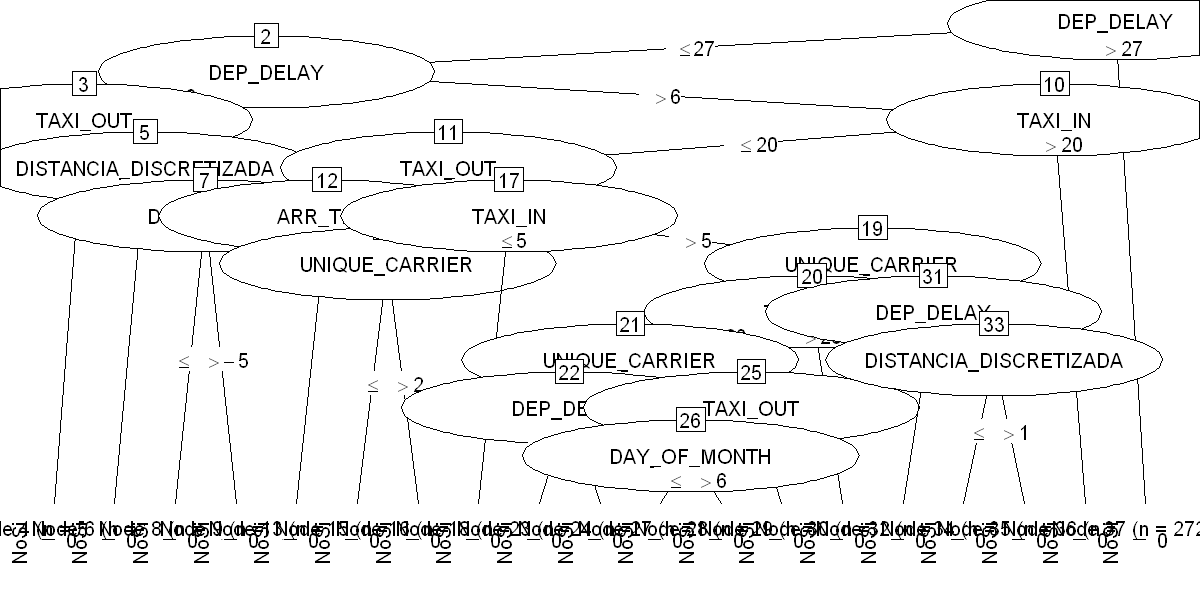

In [38]:
options(repr.plot.width=10, repr.plot.height=5)
plot(model)

El dibujo al tener tantas hojas el árbol no se aprecia bien, pero igualmente se puede entender el árbol a través de la lectura del mismo.

En este caso no utiliza el componente creado con componentes principales y presenta un árbol con una tasa de error del 3,2%, un poco inferior que la del árbol original, clasificando mal 32 elementos. 
Entendemos que no utiliza el componente creado con PCA para el árbol porque las demás variables discriminan mejor a la hora de construir el árbol. 

### Evaluamos el árbol creado mediante la matriz de confusión

In [39]:
testX$UNIQUE_CARRIER=as.numeric(testX$UNIQUE_CARRIER)
testX$ORIGIN=as.numeric(testX$ORIGIN)
testX$DISTANCIA_DISCRETIZADA=as.numeric(testX$DISTANCIA_DISCRETIZADA)
testX$C1=predict(pcaVarRetrasos,testX[,1:10])[,1]
head(testX)
p<-predict(model,testX,type="class")
sum(p==testY)/length(p)


,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA,C1
401,10.0000,7.0000,2.0000,1.0000,9.0000,15.0000,5.0000,601.0000,2.0000,23.0000,741.8062
1380,25.0000,1.0000,3.0000,7.0000,-4.0000,16.0000,14.0000,1003.0000,4.0000,7.0000,339.7201
212,27.0000,3.0000,1.0000,4.0000,162.0000,14.0000,27.0000,1659.0000,2.0000,9.0000,-314.4901
641,22.0000,5.0000,2.0000,7.0000,49.0000,16.0000,13.0000,1800.0000,4.0000,14.0000,-456.6834
1056,8.0000,5.0000,3.0000,4.0000,14.0000,16.0000,34.0000,1846.0000,2.0000,13.0000,-503.0693
1290,20.0000,3.0000,3.0000,4.0000,0.0000,12.0000,11.0000,1758.0000,2.0000,13.0000,-415.1961


[1] 0.9247525

In [42]:
CrossTable(testY,p,prop.chisq=FALSE,prop.c=FALSE,prop.r=FALSE,dnn = c('actual Retrasos','predicted retrasos'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  505 

 
                | predicted retrasos 
actual Retrasos |        No |        Si | Row Total | 
----------------|-----------|-----------|-----------|
             No |       322 |        20 |       342 | 
                |     0.638 |     0.040 |           | 
----------------|-----------|-----------|-----------|
             Si |        18 |       145 |       163 | 
                |     0.036 |     0.287 |           | 
----------------|-----------|-----------|-----------|
   Column Total |       340 |       165 |       505 | 
----------------|-----------|-----------|-----------|

 


#### El error del árbol es del 0.076% con 38 casos mal clasificados.

### Vamos a crear otro arbol con PCA sin usar la variable DEP_DELAY 

Para ver si construimos un árbol que utilice el componente creado con PCA vamos a descartar la variable DEP_DELAY que es la primera que utiliza el árbol original para discriminar.

In [6]:
#leemos el conjunto de datos original
Y <- read.csv(file="RetrasosVuelosJFK.csv",comment.char = "#", sep=";")
vuelosJFK<-Y[!is.na(Y$ARR_DEL15),]

head(vuelosJFK)
dim(vuelosJFK)

#Reordenamos al azar
vuelosJFK <- vuelosJFK[sample(nrow(vuelosJFK)),]
#Escogemos las variables
X<-vuelosJFK[,c(3:5,8,16,17,19,40,41,39)]
head(X)
# Separamos conjuntos de test y de entreno
train<-X[1:1000,]
test<-X[1001:1505,]
#revsisamos que haya proporcion parecida
prop.table(table(train$RETRASADO))
prop.table(table(test$RETRASADO))
#asignamos variables de clasificacion
trainX<-train[,c(1:9)]
trainY<-train[,c(10)]
testX<-test[,c(1:9)]
testY<-test[,c(10)]
#pasamos a numericas las variables que no lo son
trainX$UNIQUE_CARRIER=as.numeric(trainX$UNIQUE_CARRIER)
trainX$ORIGIN=as.numeric(trainX$ORIGIN)
trainX$DISTANCIA_DISCRETIZADA=as.numeric(trainX$DISTANCIA_DISCRETIZADA)
testX$UNIQUE_CARRIER=as.numeric(testX$UNIQUE_CARRIER)
testX$ORIGIN=as.numeric(testX$ORIGIN)
testX$DISTANCIA_DISCRETIZADA=as.numeric(testX$DISTANCIA_DISCRETIZADA)
#Calculamos componentes
pcaVarRetrasos <- princomp(trainX)
summary(pcaVarRetrasos) 

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,RETRASADO,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA
1,2016,7,1,5,AA,N793AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
2,2016,7,2,6,AA,N784AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
3,2016,7,4,1,AA,N785AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
4,2016,7,5,2,AA,N790AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
5,2016,7,6,3,AA,N799AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6
6,2016,7,7,4,AA,N786AA,1,BOS,JFK,600,...,NA,NA,NA,NA,NA,NA,NA,No,0 a 400,6


[1] 1505   41

,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,TAXI_OUT,TAXI_IN,ARR_TIME,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA,RETRASADO
555,15,5,B6,MCO,15,3,1156,800 a 1200,9,No
907,30,6,B6,BOS,16,5,1019,0 a 400,9,No
1222,18,1,DL,AUS,32,16,1904,1200 a 4000,13,Si
1166,14,4,DL,BOS,42,11,2132,0 a 400,17,Si
704,21,4,B6,BOS,15,8,641,0 a 400,5,No
241,3,7,B6,ACK,10,6,1720,0 a 400,16,No



   No    Si 
0.657 0.343 


       No        Si 
0.6732673 0.3267327 

Importance of components:
                           Comp.1       Comp.2      Comp.3       Comp.4
Standard deviation     572.013122 1.030555e+01 9.005066529 6.3469455636
Proportion of Variance   0.999219 3.243327e-04 0.000247641 0.0001230207
Cumulative Proportion    0.999219 9.995433e-01 0.999790988 0.9999140091
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     4.421623e+00 1.976453e+00 1.8455761124 9.654254e-01
Proportion of Variance 5.970518e-05 1.192949e-05 0.0000104019 2.846336e-06
Cumulative Proportion  9.999737e-01 9.999856e-01 0.9999960457 9.999989e-01
                             Comp.9
Standard deviation     6.023439e-01
Proportion of Variance 1.107995e-06
Cumulative Proportion  1.000000e+00

In [8]:
#Añadimos la variable al conjunto
trainX$C1=predict(pcaVarRetrasos,trainX[,1:9])[,1]
head(trainX)

,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN,TAXI_OUT,TAXI_IN,ARR_TIME,DISTANCIA_DISCRETIZADA,CRS_DEP_TIME_HORA,C1
555,15.0000,5.0000,2.0000,7.0000,15.0000,3.0000,1156.0000,4.0000,9.0000,206.2414
907,30.0000,6.0000,2.0000,5.0000,16.0000,5.0000,1019.0000,1.0000,9.0000,343.2339
1222,18.0000,1.0000,3.0000,4.0000,32.0000,16.0000,1904.0000,2.0000,13.0000,-541.8171
1166,14.0000,4.0000,3.0000,5.0000,42.0000,11.0000,2132.0000,1.0000,17.0000,-769.8408
704,21.0000,4.0000,2.0000,5.0000,15.0000,8.0000,641.0000,1.0000,5.0000,721.2426
241,3.0000,7.0000,2.0000,2.0000,10.0000,6.0000,1720.0000,1.0000,16.0000,-357.7677


In [9]:
#Construimos el árbol y lo visualizamos
model<-C50::C5.0(trainX[,1:10],trainY)
summary(model)
model


Call:
C5.0.default(x = trainX[, 1:10], y = trainY)


C5.0 [Release 2.07 GPL Edition]  	Sat Nov 26 15:19:59 2016
-------------------------------

Class specified by attribute `outcome'

Read 1000 cases (11 attributes) from undefined.data

Decision tree:

CRS_DEP_TIME_HORA <= 12:
:...C1 <= -83.78393:
:   :...ARR_TIME > 1457: Si (18)
:   :   ARR_TIME <= 1457:
:   :   :...UNIQUE_CARRIER <= 2: Si (2)
:   :       UNIQUE_CARRIER > 2: No (6/1)
:   C1 > -83.78393:
:   :...UNIQUE_CARRIER > 2: No (170/5)
:       UNIQUE_CARRIER <= 2:
:       :...ARR_TIME > 1406:
:           :...ARR_TIME <= 1412: No (6/1)
:           :   ARR_TIME > 1412: Si (10)
:           ARR_TIME <= 1406:
:           :...DISTANCIA_DISCRETIZADA > 3:
:               :...CRS_DEP_TIME_HORA > 7: No (53/1)
:               :   CRS_DEP_TIME_HORA <= 7:
:               :   :...C1 <= 511.2653: Si (3)
:               :       C1 > 511.2653: No (15)
:               DISTANCIA_DISCRETIZADA <= 3:
:               :...ARR_TIME <= 1033:
:         


Call:
C5.0.default(x = trainX[, 1:10], y = trainY)

Classification Tree
Number of samples: 1000 
Number of predictors: 10 

Tree size: 63 

Non-standard options: attempt to group attributes


En este caso el árbol creado utiliza el componente C1 de PCA como segunda variable. La tasa de error ha disminuido hasta 2.5%. Se han clasificado mal 25 casos de la clase Si. Los vuelos no retrasados se han clasificados todos bien. 

# c.3) Utilizamos SVP para crear un tercer arbol

In [78]:
trainX<-train[,c(1:8,10:11)]
trainY<-train[,c(9)]
testX<-test[,c(1:8,10:11)]
testY<-test[,c(9)]
trainX$UNIQUE_CARRIER=as.numeric(trainX$UNIQUE_CARRIER)
trainX$ORIGIN=as.numeric(trainX$ORIGIN)
trainX$DISTANCIA_DISCRETIZADA=as.numeric(trainX$DISTANCIA_DISCRETIZADA)
testX$UNIQUE_CARRIER=as.numeric(testX$UNIQUE_CARRIER)
testX$ORIGIN=as.numeric(testX$ORIGIN)
testX$DISTANCIA_DISCRETIZADA=as.numeric(testX$DISTANCIA_DISCRETIZADA)

### Utilizamos SVD para extraer características

In [82]:
svdTrainX<-svd(trainX)
svdTestX<-svd(testX)
svdTrainX$d
svdTrainX$u

[1] 46423.18036  2928.70812   394.25858   270.84893   206.29368   143.88622
 [7]    77.85393    60.36144    30.84980    22.81474

-0.0301511599285062,-0.0113875391641891,0.0222451151855527,-0.032127917101473,0.0231869339287622,0.0125537882913239,0.0251161172918523,-0.0204440583222193,-0.00498344193328086,-0.0399561211858134
-0.0217597760896629,-0.00834934769672685,-0.0468602824320557,0.0194202750649721,-0.00802018618801647,0.0151759914727093,-0.0118538649349559,0.0128377090799823,-0.0206585188031419,0.053612903959778
-0.039659071644497,-0.00781840701162624,0.0328195825173498,-0.0181216956830941,0.0006663975650361,-0.0301591857151009,-0.0183043765698966,0.0155604674672134,-0.047390314935964,0.0191926482728052
-0.0163270312019246,-0.0074156714440904,-0.0161860954181638,-0.0189157139157074,0.0228143398247763,0.00859505305469388,0.0363981933227,-0.0128244054737194,-0.0229817656774698,0.0652026779140466
-0.0029733083202049,0.0647404676324048,-0.0444975343247005,-0.00892979234002724,0.0236912486754933,-0.0803491824507047,0.0305036496378027,0.0272394451234308,0.0108244098473755,0.0329342959233052
-0.0217552507567471,-0.00814105435901989,-0.00462734274767919,-0.0326370029329573,-0.000978962646390648,-0.00135350682721091,0.00783663248428891,0.021184148751859,-0.0230401547766906,0.0712430291452732
-0.0152938120172382,-0.00701501800711318,-0.0210564225674227,-0.0190989779844835,0.0195532070927381,0.0150011025605942,0.0428550142867054,-0.0249661446047097,-0.0405550832720014,-0.0210872911118909
-0.0390687589875012,-0.0160022213257681,-0.00312167942017241,0.0207189029123261,0.0534750655662531,0.0275047761396089,-0.0169662666029541,-0.0161422369302334,0.00765074039458924,0.0162258964352219
-0.0412806634489355,0.00808176977949687,0.0163366845464265,-0.0371705464815789,0.098390542688874,0.0431196658390665,-0.0242576022678037,-0.0213257838464629,0.0463964916717177,-0.0128820878996532
-0.0390753401306728,0.00309155924263443,0.00100296379061395,0.0480783262599026,0.00828429577325879,-0.00448834916761683,-0.0573924847755148,-0.0189983295881518,-0.00228282637473778,-0.0013431753699474
-0.0306067497342824,-0.0127542179381996,-0.0201807154782535,0.0271799882532919,0.0558321276626813,0.0199951760726132,0.00109477763163762,-0.0442741839134615,0.0505521238987574,0.000179501573443531


[1] 50559.06

[1] 46423.18

[1] 0.9181971

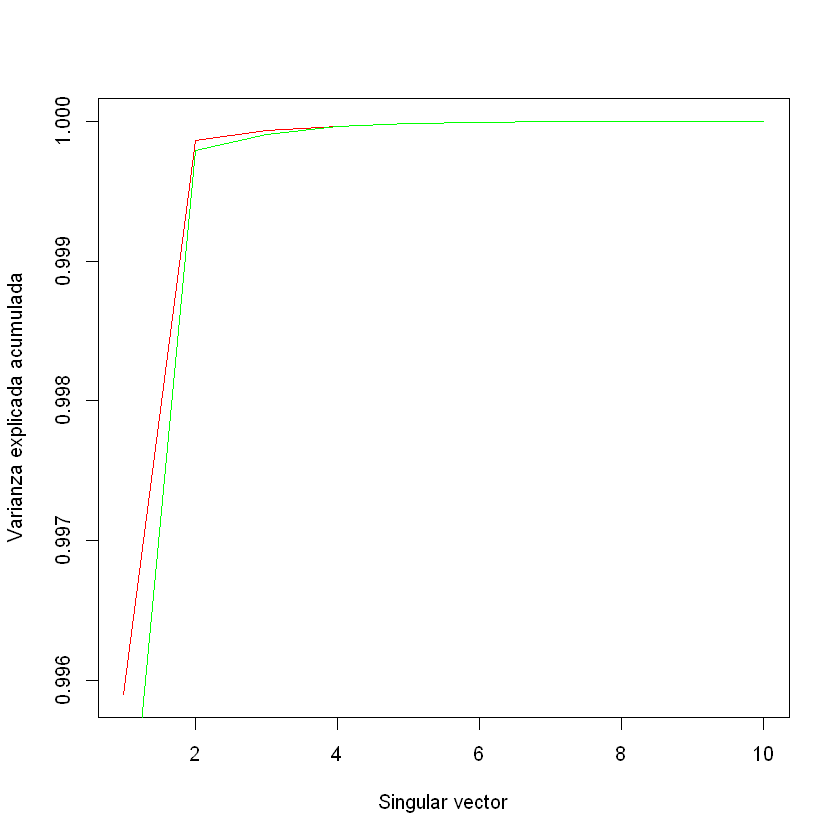

In [83]:
sum(svdTrainX$d)
var=sum(svdTrainX$d[1])
var
var/sum(svdTrainX$d)
plot(cumsum(svdTrainX$d^2/sum(svdTrainX$d^2)),type="l",col="red",xlab="Singular vector",ylab="Varianza explicada acumulada")
lines(cumsum(svdTestX$d^2/sum(svdTestX$d^2)),col="green")



### Añadir una nueva variable C1 a los datos usando el primer SVD que ya acumula 91% de varianza

In [84]:
trainX$C1=svdTrainX$u[,1]
testX$C1=svdTestX$u[,1]

### Creamos el tercer árbol con la nueva variable usando todos los parámetros por defecto

In [87]:
model2 <- C50::C5.0(trainX[,c(1:11)],trainY)
model2
summary(model2)



Call:
C5.0.default(x = trainX[, c(1:11)], y = trainY)

Classification Tree
Number of samples: 1000 
Number of predictors: 11 

Tree size: 18 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = trainX[, c(1:11)], y = trainY)


C5.0 [Release 2.07 GPL Edition]  	Thu Nov 24 23:50:51 2016
-------------------------------

Class specified by attribute `outcome'

Read 1000 cases (12 attributes) from undefined.data

Decision tree:

DEP_DELAY > 29: Si (257/1)
DEP_DELAY <= 29:
:...DEP_DELAY <= 6: No (582/18)
    DEP_DELAY > 6:
    :...TAXI_IN <= 9:
        :...DEP_DELAY <= 16: No (58/7)
        :   DEP_DELAY > 16:
        :   :...TAXI_OUT > 18: Si (5)
        :       TAXI_OUT <= 18:
        :       :...UNIQUE_CARRIER > 2: No (9/1)
        :           UNIQUE_CARRIER <= 2:
        :           :...UNIQUE_CARRIER <= 1:
        :               :...DEP_DELAY <= 21: No (2)
        :               :   DEP_DELAY > 21: Si (6/1)
        :               UNIQUE_CARRIER > 1:
        :               :...DAY_OF_WEEK <= 1: Si (4/1)
        :                   DAY_OF_WEEK > 1:
        :                   :...DEP_DELAY <= 18: Si (2)
        :                       DEP_DELAY > 18: 

Al igual que ha ocurrido al crear un árbol con PCA, con las mismas variables que el árbol original, cuando hemos creado un árbol con SVD añadiendo el primer factor a las variables seleccionadas, no ha utilizado este factor para crear el árbol. De nuevo entendemos que el resto de varibles discriminan mejor a la hora de crear el árbol.